In [1]:
import pandas as pd
import numpy as np
import os
import glob
import datetime

from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)
import tensorflow

# from tensorflow.compat.v1.keras.backend import get_session
# tensorflow.compat.v1.disable_v2_behavior()
# import shap

import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout
from sklearn import preprocessing

import tensorflow as tf

import numpy as np
import os
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import datetime
from os.path import isfile, join
from sys import getsizeof
import glob

from random import *

import matplotlib.pyplot as plt
import mpld3
mpld3.enable_notebook()
import numpy as np

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

# Only using years 2010, 2011, 2012, 2013, and 2014 because of the auroral boundary database used only has those dates

In [2]:
file_load_df_cumulative = '../ParticlePrecipitation/ML_DB_subsamp_ext_full_dfCumulative_complexHemisphereCombine.csv'
DMSP_DATA_DIR=''
df_cumulative = pd.read_csv(os.path.join(DMSP_DATA_DIR,file_load_df_cumulative))
df_cumulative = df_cumulative.sort_values(by=['ID_SC', 'Datetimes'])
df_cumulative = df_cumulative.set_index('Datetimes')
df_cumulative.index = pd.to_datetime(df_cumulative.index)

cols_to_drop_validation = [c for c in df_cumulative.columns if ('STD' in c) | ('AVG' in c) | ('SC_AACGM_LTIME'==c)]
# cols_to_drop_validation = [c for c in df.columns if ('1min' in c) | ('3min' in c) | ('4min' in c) | ('5min' in c) | ('15min' in c) | ('newell' in c) | ('STD' in c) | ('AVG' in c) | ('SC_AACGM_LTIME'==c)]

df_cumulative = df_cumulative.drop(columns=cols_to_drop_validation)

# Separate training and testing data
mask_val = [(df_cumulative.index.year == 2010) & (df_cumulative['ID_SC'].values==16)]
df_val = df_cumulative[mask_val[0]].copy(deep=True)
df_train = df_cumulative.copy(deep=True).drop( df_cumulative.index[mask_val[0]])

mask_for_2010_to_2014 = [(df_train.index.year == 2010) | (df_train.index.year == 2011)
                         | (df_train.index.year == 2012) |(df_train.index.year == 2013)
                         | (df_train.index.year == 2014)]
df_train = df_train[mask_for_2010_to_2014[0]]
df_train = df_train.sort_values(by=['ID_SC', 'Datetimes'])
df_val = df_val.sort_values(by=['ID_SC', 'Datetimes'])

In [3]:
# Construct X and y
feature_cols = [c for c in df_train.columns if not 'ELE' in c]
#print( (feature_cols))
#print(df_cumulative.columns)
from sklearn import preprocessing
X_val = df_val[feature_cols].copy(deep=True)
y_val = df_val['ELE_TOTAL_ENERGY_FLUX'].copy(deep=True)
X_train = df_train[feature_cols].copy(deep=True)
y_train = df_train['ELE_TOTAL_ENERGY_FLUX'].copy(deep=True)
scaler_X = preprocessing.RobustScaler()
scaler_X = scaler_X.fit(X_train.values)
X_val_scaled = scaler_X.transform(X_val.values)
X_train_scaled = scaler_X.transform(X_train.values)

numFeatures = len(X_train.columns.to_list())
feature_labels = X_train.columns.to_list()
y_train_erg = y_train.copy(deep=True) * (1.60218e-12)
y_val_erg = y_val.copy(deep=True) * (1.60218e-12)

y_train[y_train == 0] = 0.0001
y_val[y_val == 0] = 0.0001
y_train_log = np.log10(y_train.copy(deep=True))
y_val_log = np.log10(y_val.copy(deep=True))

%matplotlib inline  
import matplotlib.pyplot as plt
X = np.array(X_train_scaled, dtype=np.float32)
X_test = np.array(X_val_scaled, dtype=np.float32)

# First train without considering the auroral regions at all to get a baseline MSE accuracy

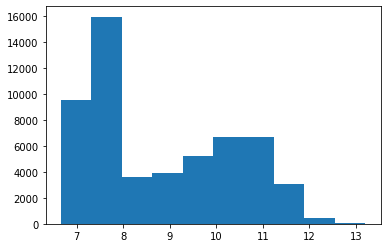

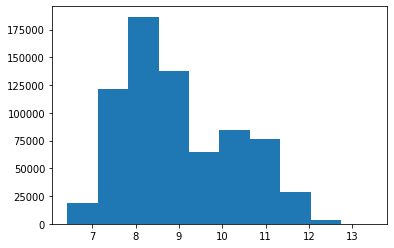

In [4]:
plt.figure()
# summarize history for loss
plt.hist(y_val_log.values)
plt.show()

plt.figure()
# summarize history for loss
plt.hist(y_train_log.values)
plt.show()

Epoch 1/1000
705/705 [==============================] - 2s 2ms/step - loss: 8.6359 - mse: 8.6359 - val_loss: 2.0305 - val_mse: 2.0305
Epoch 2/1000
705/705 [==============================] - 2s 2ms/step - loss: 2.1392 - mse: 2.1392 - val_loss: 1.8720 - val_mse: 1.8720
Epoch 3/1000
705/705 [==============================] - 2s 2ms/step - loss: 1.3416 - mse: 1.3416 - val_loss: 1.2751 - val_mse: 1.2751
Epoch 4/1000
705/705 [==============================] - 1s 2ms/step - loss: 1.0260 - mse: 1.0260 - val_loss: 0.9533 - val_mse: 0.9533
Epoch 5/1000
705/705 [==============================] - 1s 2ms/step - loss: 0.8080 - mse: 0.8080 - val_loss: 0.7689 - val_mse: 0.7689
Epoch 6/1000
705/705 [==============================] - 1s 2ms/step - loss: 0.6878 - mse: 0.6878 - val_loss: 0.7340 - val_mse: 0.7340
Epoch 7/1000
705/705 [==============================] - 1s 2ms/step - loss: 0.6422 - mse: 0.6422 - val_loss: 0.7103 - val_mse: 0.7103
Epoch 8/1000
705/705 [==============================] - 1s 2ms

Epoch 62/1000
705/705 [==============================] - 2s 2ms/step - loss: 0.4814 - mse: 0.4814 - val_loss: 0.6254 - val_mse: 0.6254
Epoch 63/1000
705/705 [==============================] - 1s 2ms/step - loss: 0.4809 - mse: 0.4809 - val_loss: 0.6023 - val_mse: 0.6023
Epoch 64/1000
705/705 [==============================] - 1s 2ms/step - loss: 0.4811 - mse: 0.4811 - val_loss: 0.6137 - val_mse: 0.6137
Epoch 65/1000
705/705 [==============================] - 1s 2ms/step - loss: 0.4798 - mse: 0.4798 - val_loss: 0.5998 - val_mse: 0.5998
Epoch 66/1000
705/705 [==============================] - 1s 2ms/step - loss: 0.4817 - mse: 0.4817 - val_loss: 0.6000 - val_mse: 0.6000
Epoch 67/1000
705/705 [==============================] - 1s 2ms/step - loss: 0.4802 - mse: 0.4802 - val_loss: 0.5992 - val_mse: 0.5992
Epoch 68/1000
705/705 [==============================] - 2s 2ms/step - loss: 0.4783 - mse: 0.4783 - val_loss: 0.6091 - val_mse: 0.6091
Epoch 69/1000
705/705 [==============================] 

705/705 [==============================] - 2s 2ms/step - loss: 0.4616 - mse: 0.4616 - val_loss: 0.6021 - val_mse: 0.6021
Epoch 123/1000
705/705 [==============================] - 1s 2ms/step - loss: 0.4616 - mse: 0.4616 - val_loss: 0.6012 - val_mse: 0.6012
Epoch 124/1000
705/705 [==============================] - 2s 2ms/step - loss: 0.4615 - mse: 0.4615 - val_loss: 0.5974 - val_mse: 0.5974
Epoch 125/1000
705/705 [==============================] - 2s 2ms/step - loss: 0.4623 - mse: 0.4623 - val_loss: 0.6070 - val_mse: 0.6070
Epoch 126/1000
705/705 [==============================] - 2s 2ms/step - loss: 0.4612 - mse: 0.4612 - val_loss: 0.6010 - val_mse: 0.6010
Epoch 127/1000
705/705 [==============================] - 2s 2ms/step - loss: 0.4616 - mse: 0.4616 - val_loss: 0.5941 - val_mse: 0.5941
Epoch 128/1000
705/705 [==============================] - 1s 2ms/step - loss: 0.4617 - mse: 0.4617 - val_loss: 0.6067 - val_mse: 0.6067
Epoch 129/1000
705/705 [==============================] - 1s 2m

705/705 [==============================] - 2s 2ms/step - loss: 0.4525 - mse: 0.4525 - val_loss: 0.6101 - val_mse: 0.6101
Epoch 183/1000
705/705 [==============================] - 2s 2ms/step - loss: 0.4525 - mse: 0.4525 - val_loss: 0.6012 - val_mse: 0.6012
Epoch 184/1000
705/705 [==============================] - 2s 2ms/step - loss: 0.4514 - mse: 0.4514 - val_loss: 0.6102 - val_mse: 0.6102
Epoch 185/1000
705/705 [==============================] - 2s 2ms/step - loss: 0.4519 - mse: 0.4519 - val_loss: 0.6027 - val_mse: 0.6027
Epoch 186/1000
705/705 [==============================] - 2s 2ms/step - loss: 0.4518 - mse: 0.4518 - val_loss: 0.6085 - val_mse: 0.6085
Epoch 187/1000
705/705 [==============================] - 2s 2ms/step - loss: 0.4525 - mse: 0.4525 - val_loss: 0.6183 - val_mse: 0.6183
Epoch 188/1000
705/705 [==============================] - 2s 2ms/step - loss: 0.4511 - mse: 0.4511 - val_loss: 0.6160 - val_mse: 0.6160
Epoch 189/1000
705/705 [==============================] - 2s 2m

705/705 [==============================] - 2s 2ms/step - loss: 0.4466 - mse: 0.4466 - val_loss: 0.6126 - val_mse: 0.6126
Epoch 243/1000
705/705 [==============================] - 2s 2ms/step - loss: 0.4465 - mse: 0.4465 - val_loss: 0.6202 - val_mse: 0.6202
Epoch 244/1000
705/705 [==============================] - 2s 2ms/step - loss: 0.4459 - mse: 0.4459 - val_loss: 0.6098 - val_mse: 0.6098
Epoch 245/1000
705/705 [==============================] - 2s 2ms/step - loss: 0.4481 - mse: 0.4481 - val_loss: 0.6046 - val_mse: 0.6046
Epoch 246/1000
705/705 [==============================] - 2s 3ms/step - loss: 0.4463 - mse: 0.4463 - val_loss: 0.6213 - val_mse: 0.6213
Epoch 247/1000
705/705 [==============================] - 2s 2ms/step - loss: 0.4466 - mse: 0.4466 - val_loss: 0.6138 - val_mse: 0.6138
Epoch 248/1000
705/705 [==============================] - 2s 3ms/step - loss: 0.4464 - mse: 0.4464 - val_loss: 0.6158 - val_mse: 0.6158
Epoch 249/1000
705/705 [==============================] - 2s 3m

705/705 [==============================] - 2s 2ms/step - loss: 0.4422 - mse: 0.4422 - val_loss: 0.6220 - val_mse: 0.6220
Epoch 303/1000
705/705 [==============================] - 2s 2ms/step - loss: 0.4423 - mse: 0.4423 - val_loss: 0.6059 - val_mse: 0.6059
Epoch 304/1000
705/705 [==============================] - 2s 2ms/step - loss: 0.4426 - mse: 0.4426 - val_loss: 0.6085 - val_mse: 0.6085
Epoch 305/1000
705/705 [==============================] - 2s 2ms/step - loss: 0.4423 - mse: 0.4423 - val_loss: 0.6131 - val_mse: 0.6131
Epoch 306/1000
705/705 [==============================] - 2s 2ms/step - loss: 0.4427 - mse: 0.4427 - val_loss: 0.6161 - val_mse: 0.6161
Epoch 307/1000
705/705 [==============================] - 2s 2ms/step - loss: 0.4411 - mse: 0.4411 - val_loss: 0.6113 - val_mse: 0.6113
Epoch 308/1000
705/705 [==============================] - 2s 3ms/step - loss: 0.4416 - mse: 0.4416 - val_loss: 0.6080 - val_mse: 0.6080
Epoch 309/1000
705/705 [==============================] - 2s 2m

705/705 [==============================] - 2s 2ms/step - loss: 0.4383 - mse: 0.4383 - val_loss: 0.6171 - val_mse: 0.6171
Epoch 363/1000
705/705 [==============================] - 2s 2ms/step - loss: 0.4391 - mse: 0.4391 - val_loss: 0.6099 - val_mse: 0.6099
Epoch 364/1000
705/705 [==============================] - 2s 2ms/step - loss: 0.4397 - mse: 0.4397 - val_loss: 0.6184 - val_mse: 0.6184
Epoch 365/1000
705/705 [==============================] - 2s 2ms/step - loss: 0.4396 - mse: 0.4396 - val_loss: 0.6216 - val_mse: 0.6216
Epoch 366/1000
705/705 [==============================] - 2s 2ms/step - loss: 0.4398 - mse: 0.4398 - val_loss: 0.6262 - val_mse: 0.6262
Epoch 367/1000
705/705 [==============================] - 2s 2ms/step - loss: 0.4390 - mse: 0.4390 - val_loss: 0.6115 - val_mse: 0.6115
Epoch 368/1000
705/705 [==============================] - 2s 2ms/step - loss: 0.4400 - mse: 0.4400 - val_loss: 0.6153 - val_mse: 0.6153
Epoch 369/1000
705/705 [==============================] - 2s 2m

705/705 [==============================] - 2s 2ms/step - loss: 0.4371 - mse: 0.4371 - val_loss: 0.6148 - val_mse: 0.6148
Epoch 423/1000
705/705 [==============================] - 2s 2ms/step - loss: 0.4368 - mse: 0.4368 - val_loss: 0.6029 - val_mse: 0.6029
Epoch 424/1000
705/705 [==============================] - 2s 2ms/step - loss: 0.4378 - mse: 0.4378 - val_loss: 0.6107 - val_mse: 0.6107
Epoch 425/1000
705/705 [==============================] - 2s 2ms/step - loss: 0.4380 - mse: 0.4380 - val_loss: 0.6195 - val_mse: 0.6195
Epoch 426/1000
705/705 [==============================] - 2s 2ms/step - loss: 0.4364 - mse: 0.4364 - val_loss: 0.6045 - val_mse: 0.6045
Epoch 427/1000
705/705 [==============================] - 2s 2ms/step - loss: 0.4376 - mse: 0.4376 - val_loss: 0.6158 - val_mse: 0.6158
Epoch 428/1000
705/705 [==============================] - 2s 2ms/step - loss: 0.4369 - mse: 0.4369 - val_loss: 0.6183 - val_mse: 0.6183
Epoch 429/1000
705/705 [==============================] - 2s 2m

705/705 [==============================] - 2s 2ms/step - loss: 0.4349 - mse: 0.4349 - val_loss: 0.6013 - val_mse: 0.6013
Epoch 483/1000
705/705 [==============================] - 2s 2ms/step - loss: 0.4356 - mse: 0.4356 - val_loss: 0.6059 - val_mse: 0.6059
Epoch 484/1000
705/705 [==============================] - 2s 2ms/step - loss: 0.4352 - mse: 0.4352 - val_loss: 0.6071 - val_mse: 0.6071
Epoch 485/1000
705/705 [==============================] - 2s 2ms/step - loss: 0.4366 - mse: 0.4366 - val_loss: 0.6095 - val_mse: 0.6095
Epoch 486/1000
705/705 [==============================] - 2s 2ms/step - loss: 0.4348 - mse: 0.4348 - val_loss: 0.6104 - val_mse: 0.6104
Epoch 487/1000
705/705 [==============================] - 2s 2ms/step - loss: 0.4352 - mse: 0.4352 - val_loss: 0.6039 - val_mse: 0.6039
Epoch 488/1000
705/705 [==============================] - 2s 2ms/step - loss: 0.4357 - mse: 0.4357 - val_loss: 0.6079 - val_mse: 0.6079
Epoch 489/1000
705/705 [==============================] - 2s 2m

705/705 [==============================] - 2s 2ms/step - loss: 0.4342 - mse: 0.4342 - val_loss: 0.6145 - val_mse: 0.6145
Epoch 543/1000
705/705 [==============================] - 2s 2ms/step - loss: 0.4338 - mse: 0.4338 - val_loss: 0.6086 - val_mse: 0.6086
Epoch 544/1000
705/705 [==============================] - 2s 2ms/step - loss: 0.4340 - mse: 0.4340 - val_loss: 0.5954 - val_mse: 0.5954
Epoch 545/1000
705/705 [==============================] - 2s 2ms/step - loss: 0.4332 - mse: 0.4332 - val_loss: 0.6082 - val_mse: 0.6082
Epoch 546/1000
705/705 [==============================] - 2s 2ms/step - loss: 0.4338 - mse: 0.4338 - val_loss: 0.6079 - val_mse: 0.6079
Epoch 547/1000
705/705 [==============================] - 2s 2ms/step - loss: 0.4332 - mse: 0.4332 - val_loss: 0.6087 - val_mse: 0.6087
Epoch 548/1000
705/705 [==============================] - 2s 2ms/step - loss: 0.4333 - mse: 0.4333 - val_loss: 0.6084 - val_mse: 0.6084
Epoch 549/1000
705/705 [==============================] - 2s 2m

705/705 [==============================] - 2s 2ms/step - loss: 0.4326 - mse: 0.4326 - val_loss: 0.5994 - val_mse: 0.5994
Epoch 603/1000
705/705 [==============================] - 2s 2ms/step - loss: 0.4322 - mse: 0.4322 - val_loss: 0.6170 - val_mse: 0.6170
Epoch 604/1000
705/705 [==============================] - 2s 2ms/step - loss: 0.4330 - mse: 0.4330 - val_loss: 0.6011 - val_mse: 0.6011
Epoch 605/1000
705/705 [==============================] - 2s 2ms/step - loss: 0.4316 - mse: 0.4316 - val_loss: 0.6007 - val_mse: 0.6007
Epoch 606/1000
705/705 [==============================] - 2s 2ms/step - loss: 0.4324 - mse: 0.4324 - val_loss: 0.6054 - val_mse: 0.6054
Epoch 607/1000
705/705 [==============================] - 2s 2ms/step - loss: 0.4318 - mse: 0.4318 - val_loss: 0.6105 - val_mse: 0.6105
Epoch 608/1000
705/705 [==============================] - 2s 2ms/step - loss: 0.4323 - mse: 0.4323 - val_loss: 0.6079 - val_mse: 0.6079
Epoch 609/1000
705/705 [==============================] - 2s 2m

705/705 [==============================] - 2s 2ms/step - loss: 0.4306 - mse: 0.4306 - val_loss: 0.6078 - val_mse: 0.6078
Epoch 663/1000
705/705 [==============================] - 2s 2ms/step - loss: 0.4312 - mse: 0.4312 - val_loss: 0.6084 - val_mse: 0.6084
Epoch 664/1000
705/705 [==============================] - ETA: 0s - loss: 0.4310 - mse: 0.431 - 2s 2ms/step - loss: 0.4309 - mse: 0.4309 - val_loss: 0.6061 - val_mse: 0.6061
Epoch 665/1000
705/705 [==============================] - 2s 2ms/step - loss: 0.4318 - mse: 0.4318 - val_loss: 0.6094 - val_mse: 0.6094
Epoch 666/1000
705/705 [==============================] - 2s 2ms/step - loss: 0.4304 - mse: 0.4304 - val_loss: 0.6042 - val_mse: 0.6042
Epoch 667/1000
705/705 [==============================] - 2s 2ms/step - loss: 0.4297 - mse: 0.4297 - val_loss: 0.6028 - val_mse: 0.6028
Epoch 668/1000
705/705 [==============================] - 2s 2ms/step - loss: 0.4313 - mse: 0.4313 - val_loss: 0.5990 - val_mse: 0.5990
Epoch 669/1000
705/705 [=

705/705 [==============================] - 2s 2ms/step - loss: 0.4315 - mse: 0.4315 - val_loss: 0.6133 - val_mse: 0.6133
Epoch 723/1000
705/705 [==============================] - 2s 2ms/step - loss: 0.4306 - mse: 0.4306 - val_loss: 0.6024 - val_mse: 0.6024
Epoch 724/1000
705/705 [==============================] - 2s 2ms/step - loss: 0.4309 - mse: 0.4309 - val_loss: 0.6137 - val_mse: 0.6137
Epoch 725/1000
705/705 [==============================] - 2s 2ms/step - loss: 0.4296 - mse: 0.4296 - val_loss: 0.6091 - val_mse: 0.6091
Epoch 726/1000
705/705 [==============================] - 2s 2ms/step - loss: 0.4301 - mse: 0.4301 - val_loss: 0.6119 - val_mse: 0.6119
Epoch 727/1000
705/705 [==============================] - 2s 2ms/step - loss: 0.4300 - mse: 0.4300 - val_loss: 0.6158 - val_mse: 0.6158
Epoch 728/1000
705/705 [==============================] - 2s 2ms/step - loss: 0.4306 - mse: 0.4306 - val_loss: 0.6095 - val_mse: 0.6095
Epoch 729/1000
705/705 [==============================] - 2s 2m

705/705 [==============================] - 2s 2ms/step - loss: 0.4283 - mse: 0.4283 - val_loss: 0.6223 - val_mse: 0.6223
Epoch 783/1000
705/705 [==============================] - 2s 2ms/step - loss: 0.4293 - mse: 0.4293 - val_loss: 0.6017 - val_mse: 0.6017
Epoch 784/1000
705/705 [==============================] - 2s 2ms/step - loss: 0.4294 - mse: 0.4294 - val_loss: 0.6139 - val_mse: 0.6139
Epoch 785/1000
705/705 [==============================] - 2s 2ms/step - loss: 0.4291 - mse: 0.4291 - val_loss: 0.6009 - val_mse: 0.6009
Epoch 786/1000
705/705 [==============================] - 2s 2ms/step - loss: 0.4288 - mse: 0.4288 - val_loss: 0.6057 - val_mse: 0.6057
Epoch 787/1000
705/705 [==============================] - 2s 2ms/step - loss: 0.4284 - mse: 0.4284 - val_loss: 0.6009 - val_mse: 0.6009
Epoch 788/1000
705/705 [==============================] - 2s 2ms/step - loss: 0.4291 - mse: 0.4291 - val_loss: 0.6189 - val_mse: 0.6189
Epoch 789/1000
705/705 [==============================] - 2s 2m

705/705 [==============================] - 2s 3ms/step - loss: 0.4292 - mse: 0.4292 - val_loss: 0.6011 - val_mse: 0.6011
Epoch 843/1000
705/705 [==============================] - 2s 3ms/step - loss: 0.4274 - mse: 0.4274 - val_loss: 0.6106 - val_mse: 0.6106
Epoch 844/1000
705/705 [==============================] - 2s 2ms/step - loss: 0.4298 - mse: 0.4298 - val_loss: 0.6208 - val_mse: 0.6208
Epoch 845/1000
705/705 [==============================] - 2s 2ms/step - loss: 0.4285 - mse: 0.4285 - val_loss: 0.6022 - val_mse: 0.6022
Epoch 846/1000
705/705 [==============================] - 2s 2ms/step - loss: 0.4300 - mse: 0.4300 - val_loss: 0.6100 - val_mse: 0.6100
Epoch 847/1000
705/705 [==============================] - 2s 3ms/step - loss: 0.4278 - mse: 0.4278 - val_loss: 0.6121 - val_mse: 0.6121
Epoch 848/1000
705/705 [==============================] - 2s 3ms/step - loss: 0.4276 - mse: 0.4276 - val_loss: 0.6068 - val_mse: 0.6068
Epoch 849/1000
705/705 [==============================] - 2s 3m

705/705 [==============================] - 2s 3ms/step - loss: 0.4278 - mse: 0.4278 - val_loss: 0.6110 - val_mse: 0.6110
Epoch 903/1000
705/705 [==============================] - 2s 3ms/step - loss: 0.4279 - mse: 0.4279 - val_loss: 0.6141 - val_mse: 0.6141
Epoch 904/1000
705/705 [==============================] - 2s 3ms/step - loss: 0.4269 - mse: 0.4269 - val_loss: 0.6119 - val_mse: 0.6119
Epoch 905/1000
705/705 [==============================] - 2s 2ms/step - loss: 0.4278 - mse: 0.4278 - val_loss: 0.6044 - val_mse: 0.6044
Epoch 906/1000
705/705 [==============================] - 2s 3ms/step - loss: 0.4262 - mse: 0.4262 - val_loss: 0.6077 - val_mse: 0.6077
Epoch 907/1000
705/705 [==============================] - 2s 3ms/step - loss: 0.4270 - mse: 0.4270 - val_loss: 0.6099 - val_mse: 0.6099
Epoch 908/1000
705/705 [==============================] - 2s 3ms/step - loss: 0.4269 - mse: 0.4269 - val_loss: 0.6010 - val_mse: 0.6010
Epoch 909/1000
705/705 [==============================] - 2s 3m

705/705 [==============================] - 2s 3ms/step - loss: 0.4262 - mse: 0.4262 - val_loss: 0.6004 - val_mse: 0.6004
Epoch 963/1000
705/705 [==============================] - 2s 3ms/step - loss: 0.4260 - mse: 0.4260 - val_loss: 0.6115 - val_mse: 0.6115
Epoch 964/1000
705/705 [==============================] - 2s 3ms/step - loss: 0.4261 - mse: 0.4261 - val_loss: 0.6292 - val_mse: 0.6292
Epoch 965/1000
705/705 [==============================] - 2s 3ms/step - loss: 0.4254 - mse: 0.4254 - val_loss: 0.6146 - val_mse: 0.6146
Epoch 966/1000
705/705 [==============================] - 2s 3ms/step - loss: 0.4265 - mse: 0.4265 - val_loss: 0.6123 - val_mse: 0.6123
Epoch 967/1000
705/705 [==============================] - 2s 3ms/step - loss: 0.4261 - mse: 0.4261 - val_loss: 0.6163 - val_mse: 0.6163
Epoch 968/1000
705/705 [==============================] - 2s 3ms/step - loss: 0.4257 - mse: 0.4257 - val_loss: 0.6176 - val_mse: 0.6176
Epoch 969/1000
705/705 [==============================] - 2s 3m

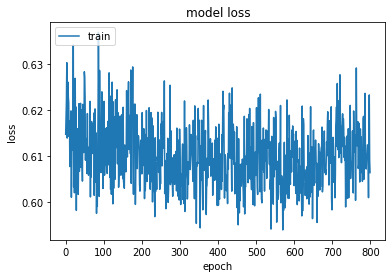

In [5]:
model = Sequential()

model.add(Dense(int(256), activation='relu'))
model.add(Dropout(.5))
model.add(Dense(64, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1))


#compile model using accuracy to measure model performance
model.compile(loss='mse', optimizer='adam',  metrics=['mse'])

history = model.fit(X, np.array(y_train_log), validation_data=(X_test, np.array(y_val_log)),
                    batch_size=1024,epochs=1000)

plt.figure()
# summarize history for loss
plt.plot(history.history['val_loss'][200:])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

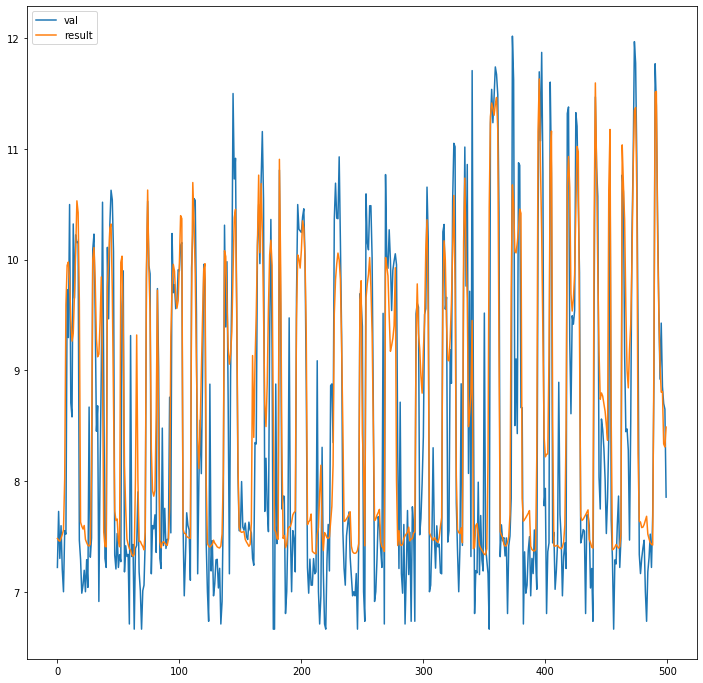

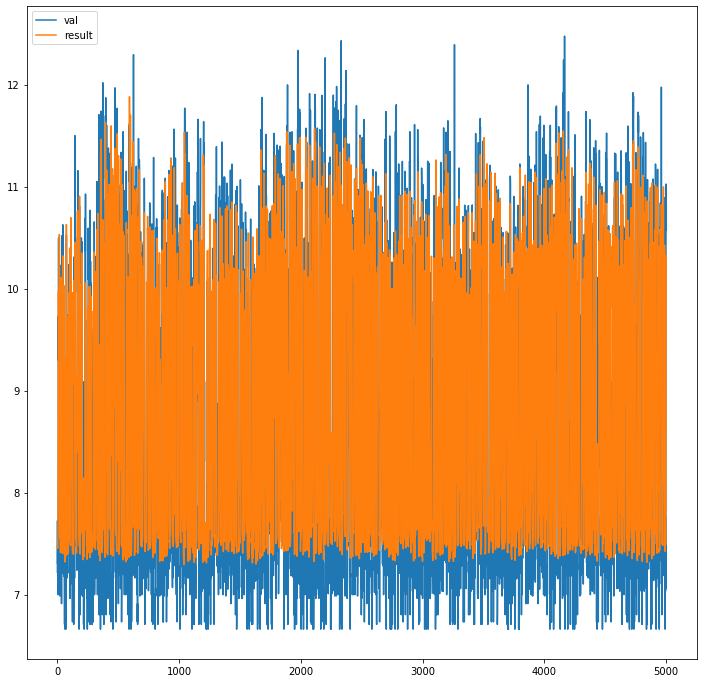

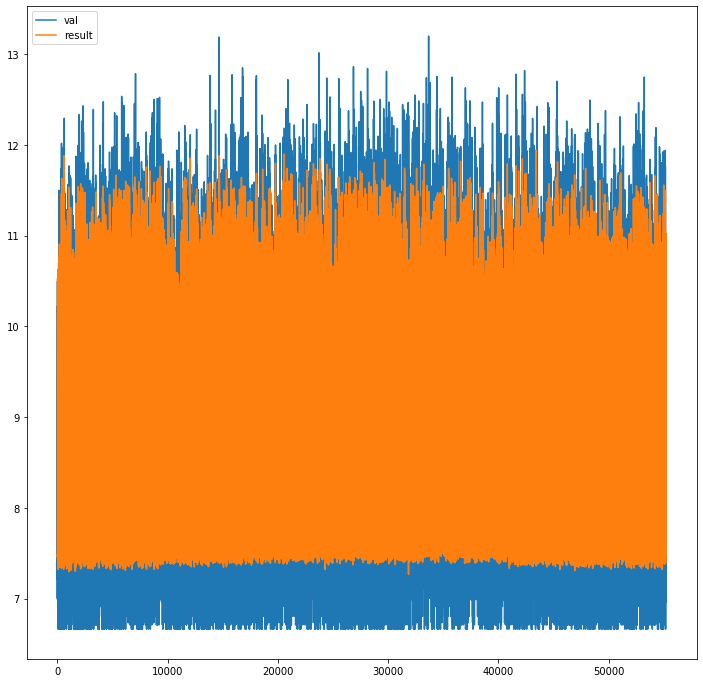

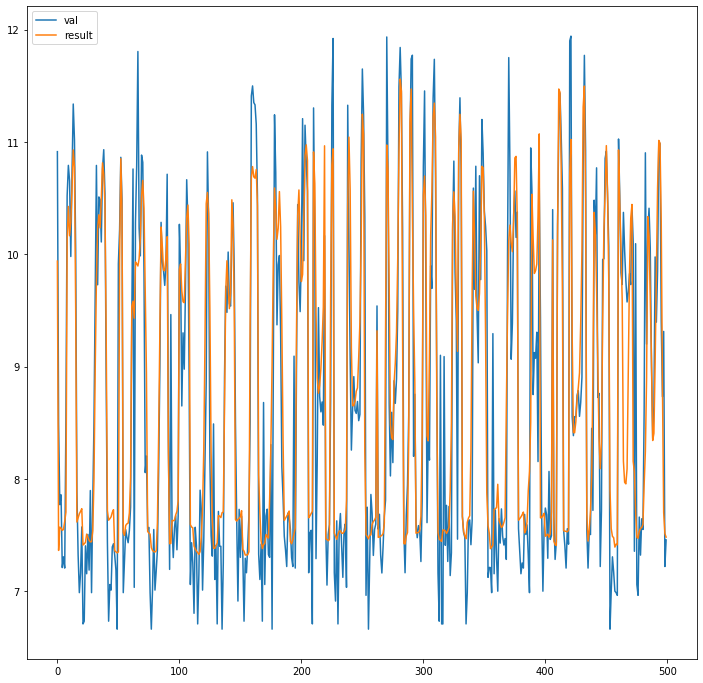

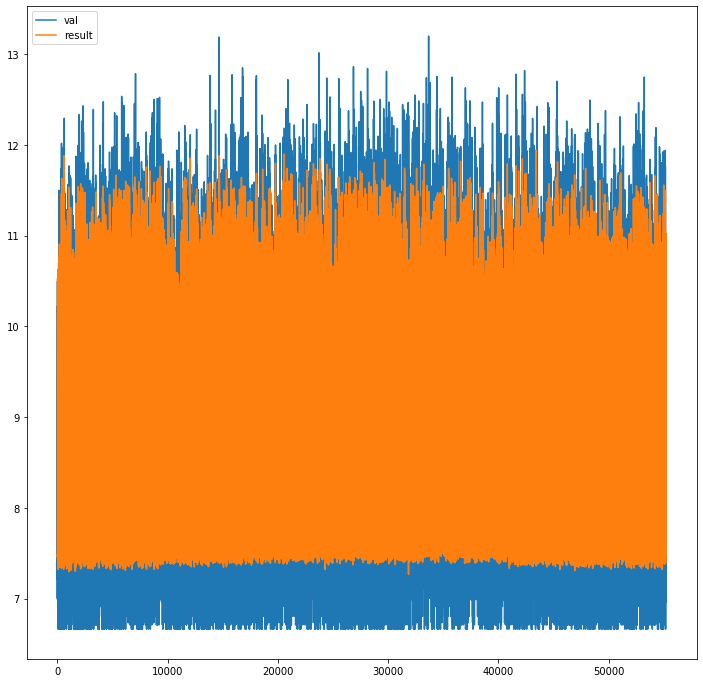

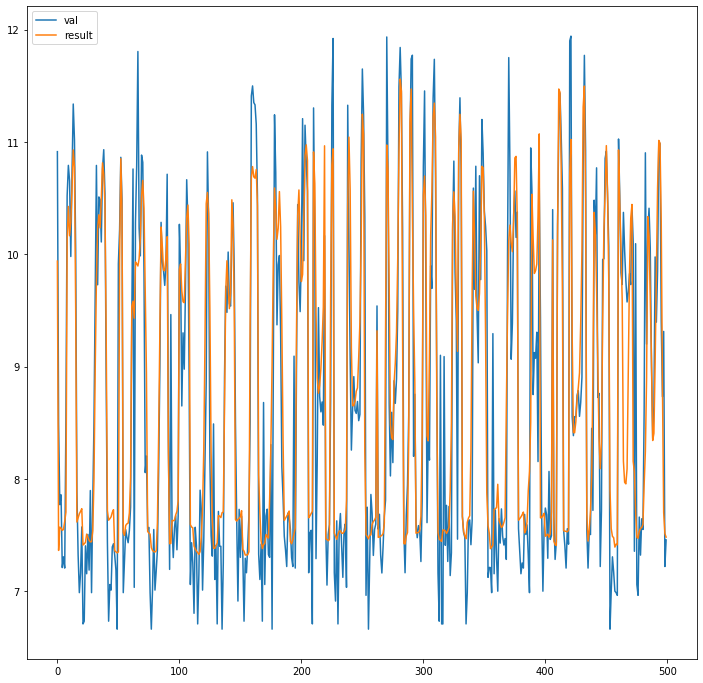

In [6]:
results = model.predict(X_val_scaled)#, y_val_log.values)#, batch_size=128)


plt.figure(figsize=(12,12))
plt.plot(y_val_log.values[:500])
plt.plot(results[:500])
plt.legend(['val', 'result'], loc='upper left')
plt.show()

plt.figure(figsize=(12,12))
plt.plot(y_val_log.values[:5000])
plt.plot(results[:5000])
plt.legend(['val', 'result'], loc='upper left')
plt.show()

plt.figure(figsize=(12,12))
plt.plot(y_val_log.values[:])
plt.plot(results[:])
plt.legend(['val', 'result'], loc='upper left')
plt.show()

plt.figure(figsize=(12,12))
plt.plot(y_val_log.values[-500:])
plt.plot(results[-500:])
plt.legend(['val', 'result'], loc='upper left')
plt.show()

plt.figure(figsize=(12,12))
plt.plot(y_val_log.values[:])
plt.plot(results[:])
plt.legend(['val', 'result'], loc='upper left')
plt.show()

plt.figure(figsize=(12,12))
plt.plot(y_val_log.values[-500:])
plt.plot(results[-500:])
plt.legend(['val', 'result'], loc='upper left')
plt.show()

# Read in the the auroral regions from a pickle file (constructed from auroral boundary transition points) 

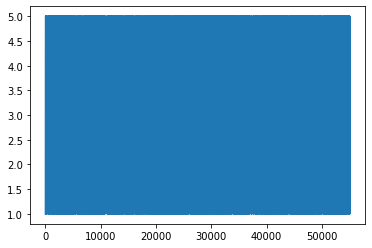

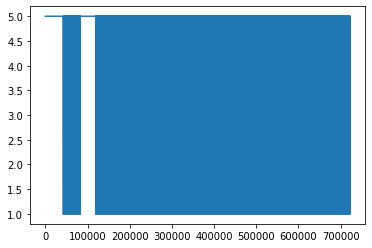

In [7]:
# df_val.to_pickle('with_aurora_type_val.pkl')
# df_train.to_pickle('with_aurora_type_train.pkl')
df_val = pd.read_pickle("./with_aurora_type_val.pkl")
df_train = pd.read_pickle("./with_aurora_type_train.pkl")


plt.figure()
plt.plot(df_val['aurora_type'].values[:])
plt.show()

plt.figure()
plt.plot(df_train['aurora_type'].values[:])
plt.show()

In [8]:
sum(df_val['aurora_type']==5)/df_val['aurora_type'].shape[0]

0.564933888788263

In [9]:
sum(df_train['aurora_type']==5)/df_train['aurora_type'].shape[0]

0.5490338676186004

# The boundary transition type regions can be reduced to 3 instead of 4 regions (plus unknown region 5), because going into the auroal region from the equatorial region or the polar region is the same for our intention of labeling just equatorial region, auroral, region, or polar region. 

# therefore type 4 is the same as type 1

In [10]:
df_val['aurora_type'][ df_val['aurora_type']==4 ]= 1
df_train['aurora_type'][ df_train['aurora_type']==4 ]= 1


False
False
False


(array([ 7048.,     0., 10174.,     0.,     0.,  6626.,     0.,     0.,
            0., 31190.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <a list of 10 Patch objects>)

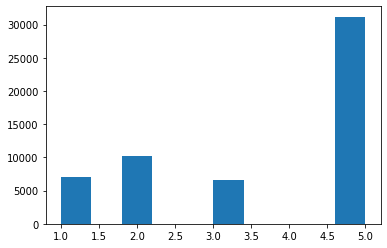

In [11]:

mask = ( np.isnan(df_train['aurora_type'])==False )
df_train_clean = df_train[mask].copy(deep=True)
print((mask.any())==False)
mask = ( np.isnan(df_val['aurora_type'])==False)
df_val_clean = df_val[mask].copy(deep=True)

print(np.isnan(df_val_clean).any().any())
print(np.isnan(df_train_clean).any().any())



plt.hist(df_val_clean['aurora_type'])

In [12]:

# Construct X and y
feature_cols = [c for c in df_train_clean.columns if not 'ELE' in c]
#print( (feature_cols))
#print(df_cumulative.columns)
from sklearn import preprocessing
X_val = df_val_clean[feature_cols].copy(deep=True)
y_val = df_val_clean['ELE_TOTAL_ENERGY_FLUX'].copy(deep=True)
X_train = df_train_clean[feature_cols].copy(deep=True)
y_train = df_train_clean['ELE_TOTAL_ENERGY_FLUX'].copy(deep=True)
scaler_X = preprocessing.RobustScaler()
scaler_X = scaler_X.fit(X_train.values)
X_val_scaled = scaler_X.transform(X_val.values)
X_train_scaled = scaler_X.transform(X_train.values)

numFeatures = len(X_train.columns.to_list())
feature_labels = X_train.columns.to_list()
y_train_erg = y_train.copy(deep=True) * (1.60218e-12)
y_val_erg = y_val.copy(deep=True) * (1.60218e-12)

y_train[y_train == 0] = 0.0001
y_val[y_val == 0] = 0.0001
y_train_log = np.log10(y_train.copy(deep=True))
y_val_log = np.log10(y_val.copy(deep=True))

%matplotlib inline  
import matplotlib.pyplot as plt
X = np.array(X_train_scaled, dtype=np.float32)
X_test = np.array(X_val_scaled, dtype=np.float32)

Y = np.array(y_train_log, dtype=np.float32)


In [13]:
X_train_no_aurora_type = X_train.drop(columns='aurora_type')
X_val_no_aurora_type = X_val.drop(columns='aurora_type')
scaler_X = scaler_X.fit(X_train_no_aurora_type.values)
X_val_no_aurora_type_scaled = scaler_X.transform(X_val_no_aurora_type.values)
X_train_no_aurora_type_scaled = scaler_X.transform(X_train_no_aurora_type.values)

y_train_aurora_type = X_train['aurora_type']
y_val_aurora_type = X_val['aurora_type']

In [14]:

label_encoder = LabelEncoder()
onehot_encoder = OneHotEncoder(sparse=False)

integer_encoded = label_encoder.fit_transform(y_train_aurora_type)
print(integer_encoded.shape)

integer_encoded_train = integer_encoded.reshape(len(integer_encoded), 1)
print(integer_encoded.shape)

y_train_aurora_type_encoded = onehot_encoder.fit_transform(integer_encoded_train)
integer_encoded = label_encoder.fit_transform(y_val_aurora_type)
integer_encoded_val = integer_encoded.reshape(len(integer_encoded), 1)
y_val_aurora_type_encoded = onehot_encoder.fit_transform(integer_encoded_val)

print(X_train_no_aurora_type_scaled.shape)

print(y_train_aurora_type.shape)
print(y_train_aurora_type_encoded.shape)

(720998,)
(720998,)
(720998, 148)
(720998,)
(720998, 4)


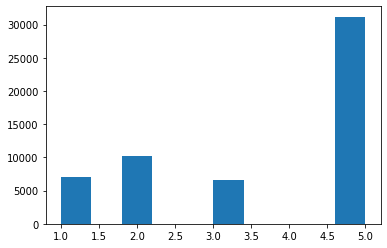

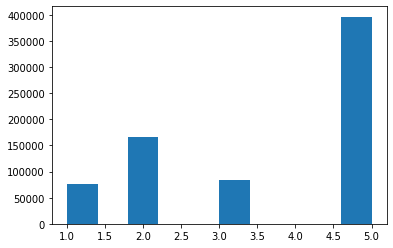

In [15]:
plt.hist(y_val_aurora_type)
plt.show()
plt.hist(y_train_aurora_type)
plt.show()

False
(324651,)
(324651,)
(324651, 148)
(324651,)
(324651, 3)


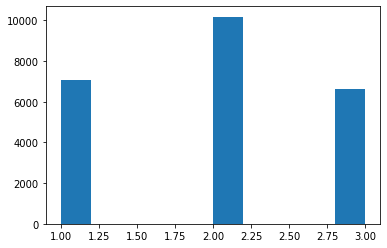

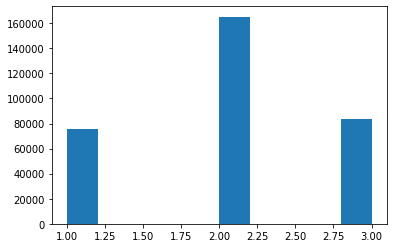

In [16]:

mask = [ (np.isnan(df_train['aurora_type'])==False) & (df_train['aurora_type'] != 5 ) ]
df_train_clean = df_train[mask[0]].copy(deep=True)
print((mask[0].any())==False)
mask = [ (np.isnan(df_val['aurora_type'])==False) & (df_val['aurora_type'] != 5 ) ]
df_val_clean = df_val[mask[0]].copy(deep=True)



# Construct X and y
feature_cols = [c for c in df_train_clean.columns if not 'ELE' in c]
from sklearn import preprocessing
X_val = df_val_clean[feature_cols].copy(deep=True)
y_val = df_val_clean['ELE_TOTAL_ENERGY_FLUX'].copy(deep=True)
X_train = df_train_clean[feature_cols].copy(deep=True)
y_train = df_train_clean['ELE_TOTAL_ENERGY_FLUX'].copy(deep=True)
scaler_X = preprocessing.RobustScaler()
scaler_X = scaler_X.fit(X_train.values)
X_val_scaled = scaler_X.transform(X_val.values)
X_train_scaled = scaler_X.transform(X_train.values)

numFeatures = len(X_train.columns.to_list())
feature_labels = X_train.columns.to_list()
y_train_erg = y_train.copy(deep=True) * (1.60218e-12)
y_val_erg = y_val.copy(deep=True) * (1.60218e-12)

y_train[y_train == 0] = 0.0001
y_val[y_val == 0] = 0.0001
y_train_log = np.log10(y_train.copy(deep=True))
y_val_log = np.log10(y_val.copy(deep=True))


X = np.array(X_train_scaled, dtype=np.float32)
X_test = np.array(X_val_scaled, dtype=np.float32)

Y = np.array(y_train_log, dtype=np.float32)

X_train_no_aurora_type = X_train.drop(columns='aurora_type')
X_val_no_aurora_type = X_val.drop(columns='aurora_type')
scaler_X = scaler_X.fit(X_train_no_aurora_type.values)
X_val_no_aurora_type_scaled = scaler_X.transform(X_val_no_aurora_type.values)
X_train_no_aurora_type_scaled = scaler_X.transform(X_train_no_aurora_type.values)

y_train_aurora_type = X_train['aurora_type']
y_val_aurora_type = X_val['aurora_type']

label_encoder = LabelEncoder()
onehot_encoder = OneHotEncoder(sparse=False)

integer_encoded = label_encoder.fit_transform(y_train_aurora_type)
print(integer_encoded.shape)

integer_encoded_train = integer_encoded.reshape(len(integer_encoded), 1)
print(integer_encoded.shape)

y_train_aurora_type_encoded = onehot_encoder.fit_transform(integer_encoded_train)
integer_encoded = label_encoder.fit_transform(y_val_aurora_type)
integer_encoded_val = integer_encoded.reshape(len(integer_encoded), 1)
y_val_aurora_type_encoded = onehot_encoder.fit_transform(integer_encoded_val)

print(X_train_no_aurora_type_scaled.shape)

print(y_train_aurora_type.shape)
print(y_train_aurora_type_encoded.shape)

sum(df_val_clean['aurora_type']==2)/df_val_clean.shape[0]
sum(df_train_clean['aurora_type']==2)/df_train_clean.shape[0]



plt.hist(y_val_aurora_type)
plt.show()
plt.hist(y_train_aurora_type)
plt.show()

In [17]:
model = Sequential()

model.add(Dense(int(256), activation='relu'))
model.add(Dropout(.5))

model.add(Dense(64, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(3,activation='softmax'))

#compile model using accuracy to measure model performance
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False), optimizer='adam',  metrics=['accuracy'])

history = model.fit(X_train_no_aurora_type_scaled, y_train_aurora_type_encoded, validation_data=(X_val_no_aurora_type_scaled, y_val_aurora_type_encoded), batch_size=32,epochs=75)

Epoch 1/75
10146/10146 [==============================] - 30s 3ms/step - loss: 0.3097 - accuracy: 0.8695 - val_loss: 0.2239 - val_accuracy: 0.9056
Epoch 2/75
10146/10146 [==============================] - 31s 3ms/step - loss: 0.2358 - accuracy: 0.9008 - val_loss: 0.2139 - val_accuracy: 0.9117
Epoch 3/75
10146/10146 [==============================] - 29s 3ms/step - loss: 0.2236 - accuracy: 0.9059 - val_loss: 0.2132 - val_accuracy: 0.9089
Epoch 4/75
10146/10146 [==============================] - 31s 3ms/step - loss: 0.2164 - accuracy: 0.9091 - val_loss: 0.2015 - val_accuracy: 0.9140
Epoch 5/75
10146/10146 [==============================] - 33s 3ms/step - loss: 0.2121 - accuracy: 0.9110 - val_loss: 0.2023 - val_accuracy: 0.9158
Epoch 6/75
10146/10146 [==============================] - 33s 3ms/step - loss: 0.2084 - accuracy: 0.9130 - val_loss: 0.2057 - val_accuracy: 0.9093
Epoch 7/75
10146/10146 [==============================] - 32s 3ms/step - loss: 0.2059 - accuracy: 0.9140 - val_loss: 0

10146/10146 [==============================] - 32s 3ms/step - loss: 0.1781 - accuracy: 0.9257 - val_loss: 0.1955 - val_accuracy: 0.9162
Epoch 57/75
10146/10146 [==============================] - 30s 3ms/step - loss: 0.1775 - accuracy: 0.9258 - val_loss: 0.1904 - val_accuracy: 0.9179
Epoch 58/75
10146/10146 [==============================] - 31s 3ms/step - loss: 0.1776 - accuracy: 0.9261 - val_loss: 0.1887 - val_accuracy: 0.9195
Epoch 59/75
10146/10146 [==============================] - 32s 3ms/step - loss: 0.1770 - accuracy: 0.9263 - val_loss: 0.1926 - val_accuracy: 0.9172
Epoch 60/75
10146/10146 [==============================] - 32s 3ms/step - loss: 0.1778 - accuracy: 0.9259 - val_loss: 0.1941 - val_accuracy: 0.9171
Epoch 61/75
10146/10146 [==============================] - 31s 3ms/step - loss: 0.1804 - accuracy: 0.9255 - val_loss: 0.1879 - val_accuracy: 0.9200
Epoch 62/75
10146/10146 [==============================] - 32s 3ms/step - loss: 0.1767 - accuracy: 0.9257 - val_loss: 0.1881

In [18]:
filename = 'best_auroral_region_predictor'

# model = tensorflow.keras.models.load_model(filename)
model.save(filename)
model.save_weights('best_auroral_region_predictor_weights.h5')

W0715 16:45:06.244117 139872504743744 deprecation.py:506] From /home/jackalak/.local/lib/python3.6/site-packages/tensorflow/python/ops/resource_variable_ops.py:1817: calling BaseResourceVariable.__init__ (from tensorflow.python.ops.resource_variable_ops) with constraint is deprecated and will be removed in a future version.
Instructions for updating:
If using Keras pass *_constraint arguments to layers.


W0715 16:45:06.994050 139872504743744 deprecation.py:323] From <ipython-input-19-42a6adf1b347>:7: Sequential.predict_classes (from tensorflow.python.keras.engine.sequential) is deprecated and will be removed after 2021-01-01.
Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


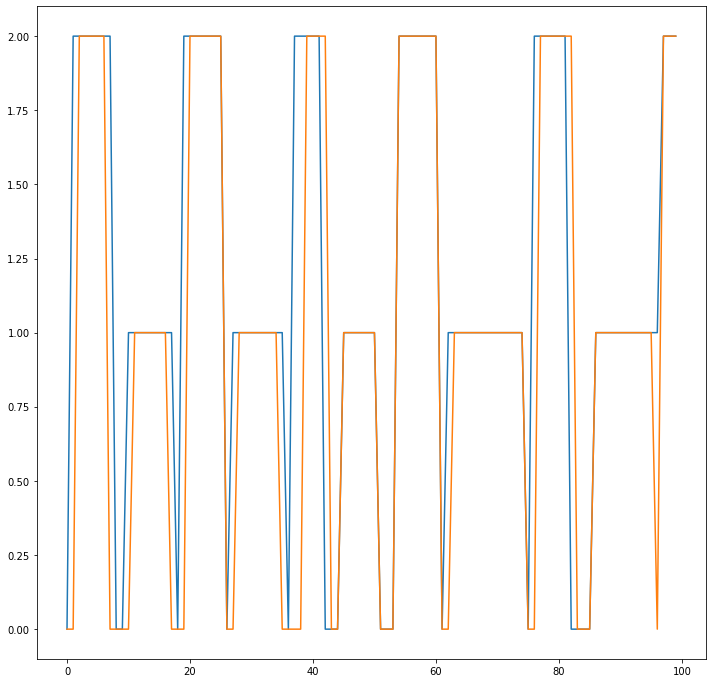

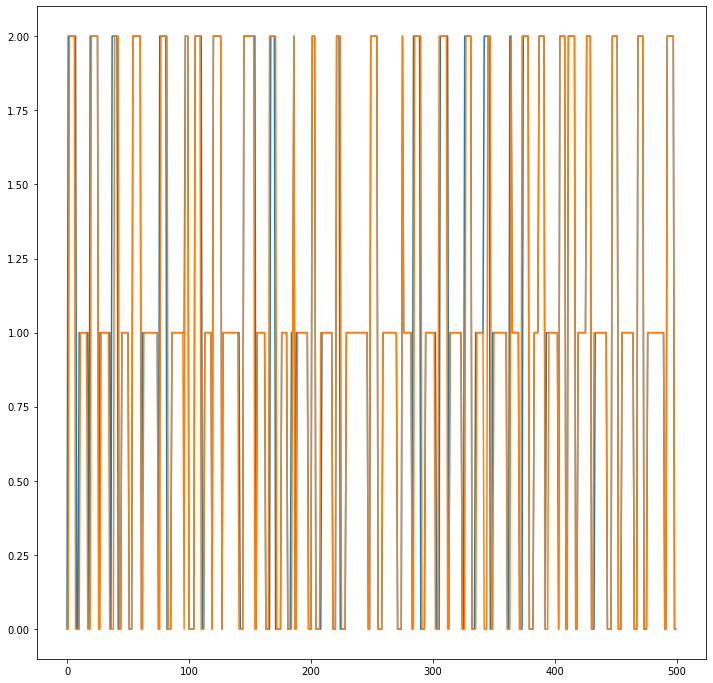

In [19]:
filename = 'best_auroral_region_predictor'

model = tensorflow.keras.models.load_model(filename)
# model.save(filename)
# model.save_weights('best_auroral_region_predictor_weights.h5')

results = (model.predict_classes(X_val_no_aurora_type_scaled))#, y_val_log.values)#, batch_size=128)



# plt.figure(figsize=(12,12))

# plt.plot( integer_encoded_val[:3000])
# plt.plot(results[:3000])
# plt.show()
plt.figure(figsize=(12,12))

plt.plot( integer_encoded_val[:100])
plt.plot(results[:100])
plt.show()

plt.figure(figsize=(12,12))

plt.plot( integer_encoded_val[:500])
plt.plot(results[:500])
plt.show()

# Now use this Auroal region predictor model to predict what type the "unknown/unspecified" regions are.  Then combine this predicted data with the known training and test data

In [20]:
 
mask = [ (np.isnan(df_train['aurora_type'])==True) | (df_train['aurora_type'] == 5 ) ]
df_train_pred = df_train[mask[0]].copy(deep=True)
print((mask[0].any())==False)
mask = [ (np.isnan(df_val['aurora_type'])==True) | (df_val['aurora_type'] == 5 ) ]
df_val_pred = df_val[mask[0]].copy(deep=True)
print(df_train_pred.shape)
print(df_val_pred.shape)

False
(397248, 150)
(31362, 150)


In [21]:
print(df_train_pred.columns)

# Construct X and y
feature_cols = [c for c in df_train_pred.columns if (not ( 'ELE' in c) | ('aurora_type' in c))]
X_train = df_train_pred[feature_cols].copy(deep=True)
X_val = df_val_pred[feature_cols].copy(deep=True)
print(X_train.shape)
scaler_X = preprocessing.RobustScaler()
scaler_X = scaler_X.fit(X_train.values)
X_val_scaled = scaler_X.transform(X_val.values)
X_train_scaled = scaler_X.transform(X_train.values)
X = np.array(X_train_scaled, dtype=np.float32)
X_test = np.array(X_val_scaled, dtype=np.float32)
#scaler_X = scaler_X.fit(X_train_no_aurora_type.values)



Index(['SC_AACGM_LAT', 'ELE_TOTAL_ENERGY_FLUX', 'ID_SC', 'sin_ut', 'cos_ut',
       'sin_doy', 'cos_doy', 'sin_SC_AACGM_LTIME', 'cos_SC_AACGM_LTIME',
       'F107',
       ...
       'AL_5min', 'AU_5min', 'SymH_5min', 'PC_5min', 'vsw_5min', 'vx_5min',
       'psw_5min', 'borovsky_5min', 'newell_5min', 'aurora_type'],
      dtype='object', length=150)
(397248, 148)


(397248, 148)
(324651,)
(397248, 150)
(397248, 150)
(324651, 150)


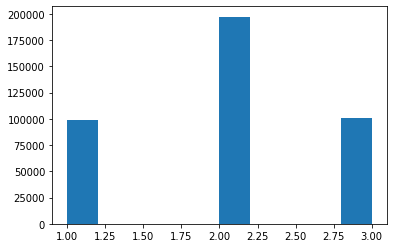

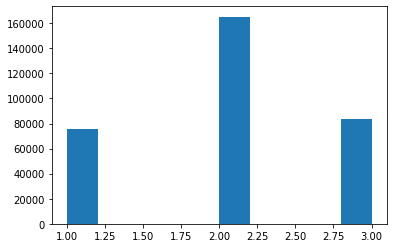

In [22]:

print(X.shape)

print((model.predict_classes(X_train_no_aurora_type_scaled)).shape)
print(df_train_pred.shape)

df_train_pred['aurora_type']= model.predict_classes(X)+1
df_val_pred['aurora_type']= model.predict_classes(X_test)+1

plt.figure()
plt.hist(df_train_pred['aurora_type'])
plt.figure()
plt.hist(df_train_clean['aurora_type'])

print(df_train_pred.shape)
print(df_train_clean.shape)

frames = [df_train_clean, df_train_pred]
df_train_new = pd.concat(frames)
frames = [df_val_clean, df_val_pred]
df_val_new = pd.concat(frames) 

In [23]:

# Construct X and y
feature_cols = [c for c in df_train_new.columns if not 'ELE' in c]

X_val = df_val_new[feature_cols].copy(deep=True)
y_val = df_val_new['ELE_TOTAL_ENERGY_FLUX'].copy(deep=True)
X_train = df_train_new[feature_cols].copy(deep=True)
y_train = df_train_new['ELE_TOTAL_ENERGY_FLUX'].copy(deep=True)
scaler_X = preprocessing.RobustScaler()
scaler_X = scaler_X.fit(X_train.values)
X_val_scaled = scaler_X.transform(X_val.values)
X_train_scaled = scaler_X.transform(X_train.values)

numFeatures = len(X_train.columns.to_list())
feature_labels = X_train.columns.to_list()
y_train_erg = y_train.copy(deep=True) * (1.60218e-12)
y_val_erg = y_val.copy(deep=True) * (1.60218e-12)

y_train[y_train == 0] = 0.0001
y_val[y_val == 0] = 0.0001
y_train_log = np.log10(y_train.copy(deep=True))
y_val_log = np.log10(y_val.copy(deep=True))

X = np.array(X_train_scaled, dtype=np.float32)
X_test = np.array(X_val_scaled, dtype=np.float32)


# Now with the supervised auroral type values and the predicted (unsupervised) type values as a new column in the input X, predict the scalar energy flux y

In [24]:
model = Sequential()

model.add(Dense(int(256), activation='relu'))
model.add(Dropout(.5))
model.add(Dense(64, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1))


#compile model using accuracy to measure model performance
model.compile(loss='mse', optimizer='adam',  metrics=['mse'])

history = model.fit(X, np.array(y_train_log), validation_data=(X_test, np.array(y_val_log)), batch_size=1024,epochs=1000)

Epoch 1/1000
705/705 [==============================] - 2s 2ms/step - loss: 8.8793 - mse: 8.8793 - val_loss: 1.7692 - val_mse: 1.7692
Epoch 2/1000
705/705 [==============================] - 2s 2ms/step - loss: 2.1652 - mse: 2.1652 - val_loss: 1.2904 - val_mse: 1.2904
Epoch 3/1000
705/705 [==============================] - 1s 2ms/step - loss: 1.2582 - mse: 1.2582 - val_loss: 1.0452 - val_mse: 1.0452
Epoch 4/1000
705/705 [==============================] - 2s 3ms/step - loss: 0.9206 - mse: 0.9206 - val_loss: 0.9384 - val_mse: 0.9384
Epoch 5/1000
705/705 [==============================] - 2s 2ms/step - loss: 0.8230 - mse: 0.8230 - val_loss: 0.8765 - val_mse: 0.8765
Epoch 6/1000
705/705 [==============================] - 2s 3ms/step - loss: 0.7537 - mse: 0.7537 - val_loss: 0.8432 - val_mse: 0.8432
Epoch 7/1000
705/705 [==============================] - 2s 2ms/step - loss: 0.7270 - mse: 0.7270 - val_loss: 0.8235 - val_mse: 0.8235
Epoch 8/1000
705/705 [==============================] - 2s 2ms

Epoch 62/1000
705/705 [==============================] - 2s 2ms/step - loss: 0.4654 - mse: 0.4654 - val_loss: 0.5892 - val_mse: 0.5892
Epoch 63/1000
705/705 [==============================] - 2s 2ms/step - loss: 0.4625 - mse: 0.4625 - val_loss: 0.6017 - val_mse: 0.6017
Epoch 64/1000
705/705 [==============================] - 2s 2ms/step - loss: 0.4652 - mse: 0.4652 - val_loss: 0.5944 - val_mse: 0.5944
Epoch 65/1000
705/705 [==============================] - 2s 2ms/step - loss: 0.4620 - mse: 0.4620 - val_loss: 0.5848 - val_mse: 0.5848
Epoch 66/1000
705/705 [==============================] - 1s 2ms/step - loss: 0.4642 - mse: 0.4642 - val_loss: 0.5913 - val_mse: 0.5913
Epoch 67/1000
705/705 [==============================] - 2s 2ms/step - loss: 0.4623 - mse: 0.4623 - val_loss: 0.5827 - val_mse: 0.5827
Epoch 68/1000
705/705 [==============================] - 2s 2ms/step - loss: 0.4615 - mse: 0.4615 - val_loss: 0.5936 - val_mse: 0.5936
Epoch 69/1000
705/705 [==============================] 

705/705 [==============================] - 2s 2ms/step - loss: 0.4486 - mse: 0.4486 - val_loss: 0.5727 - val_mse: 0.5727
Epoch 123/1000
705/705 [==============================] - 2s 2ms/step - loss: 0.4460 - mse: 0.4460 - val_loss: 0.5768 - val_mse: 0.5768
Epoch 124/1000
705/705 [==============================] - 2s 2ms/step - loss: 0.4448 - mse: 0.4448 - val_loss: 0.5781 - val_mse: 0.5781
Epoch 125/1000
705/705 [==============================] - 2s 2ms/step - loss: 0.4442 - mse: 0.4442 - val_loss: 0.5742 - val_mse: 0.5742
Epoch 126/1000
705/705 [==============================] - 2s 2ms/step - loss: 0.4452 - mse: 0.4452 - val_loss: 0.5750 - val_mse: 0.5750
Epoch 127/1000
705/705 [==============================] - 2s 2ms/step - loss: 0.4439 - mse: 0.4439 - val_loss: 0.5789 - val_mse: 0.5789
Epoch 128/1000
705/705 [==============================] - 2s 2ms/step - loss: 0.4445 - mse: 0.4445 - val_loss: 0.5802 - val_mse: 0.5802
Epoch 129/1000
705/705 [==============================] - 2s 2m

705/705 [==============================] - 2s 2ms/step - loss: 0.4361 - mse: 0.4361 - val_loss: 0.5721 - val_mse: 0.5721
Epoch 183/1000
705/705 [==============================] - 2s 2ms/step - loss: 0.4362 - mse: 0.4362 - val_loss: 0.5703 - val_mse: 0.5703
Epoch 184/1000
705/705 [==============================] - 2s 2ms/step - loss: 0.4370 - mse: 0.4370 - val_loss: 0.5695 - val_mse: 0.5695
Epoch 185/1000
705/705 [==============================] - 2s 2ms/step - loss: 0.4360 - mse: 0.4360 - val_loss: 0.5698 - val_mse: 0.5698
Epoch 186/1000
705/705 [==============================] - 2s 2ms/step - loss: 0.4351 - mse: 0.4351 - val_loss: 0.5710 - val_mse: 0.5710
Epoch 187/1000
705/705 [==============================] - 2s 2ms/step - loss: 0.4350 - mse: 0.4350 - val_loss: 0.5726 - val_mse: 0.5726
Epoch 188/1000
705/705 [==============================] - 2s 2ms/step - loss: 0.4369 - mse: 0.4369 - val_loss: 0.5755 - val_mse: 0.5755
Epoch 189/1000
705/705 [==============================] - 2s 2m

705/705 [==============================] - 2s 2ms/step - loss: 0.4304 - mse: 0.4304 - val_loss: 0.5717 - val_mse: 0.5717
Epoch 243/1000
705/705 [==============================] - 2s 2ms/step - loss: 0.4306 - mse: 0.4306 - val_loss: 0.5691 - val_mse: 0.5691
Epoch 244/1000
705/705 [==============================] - 2s 2ms/step - loss: 0.4298 - mse: 0.4298 - val_loss: 0.5692 - val_mse: 0.5692
Epoch 245/1000
705/705 [==============================] - 2s 2ms/step - loss: 0.4300 - mse: 0.4300 - val_loss: 0.5753 - val_mse: 0.5753
Epoch 246/1000
705/705 [==============================] - 2s 2ms/step - loss: 0.4308 - mse: 0.4308 - val_loss: 0.5733 - val_mse: 0.5733
Epoch 247/1000
705/705 [==============================] - 2s 2ms/step - loss: 0.4305 - mse: 0.4305 - val_loss: 0.5796 - val_mse: 0.5796
Epoch 248/1000
705/705 [==============================] - 2s 2ms/step - loss: 0.4300 - mse: 0.4300 - val_loss: 0.5752 - val_mse: 0.5752
Epoch 249/1000
705/705 [==============================] - 2s 2m

705/705 [==============================] - 2s 2ms/step - loss: 0.4268 - mse: 0.4268 - val_loss: 0.5737 - val_mse: 0.5737
Epoch 303/1000
705/705 [==============================] - 2s 2ms/step - loss: 0.4273 - mse: 0.4273 - val_loss: 0.5729 - val_mse: 0.5729
Epoch 304/1000
705/705 [==============================] - 2s 2ms/step - loss: 0.4281 - mse: 0.4281 - val_loss: 0.5707 - val_mse: 0.5707
Epoch 305/1000
705/705 [==============================] - 2s 2ms/step - loss: 0.4271 - mse: 0.4271 - val_loss: 0.5711 - val_mse: 0.5711
Epoch 306/1000
705/705 [==============================] - 2s 2ms/step - loss: 0.4298 - mse: 0.4298 - val_loss: 0.5681 - val_mse: 0.5681
Epoch 307/1000
705/705 [==============================] - 2s 2ms/step - loss: 0.4275 - mse: 0.4275 - val_loss: 0.5701 - val_mse: 0.5701
Epoch 308/1000
705/705 [==============================] - 2s 2ms/step - loss: 0.4261 - mse: 0.4261 - val_loss: 0.5693 - val_mse: 0.5693
Epoch 309/1000
705/705 [==============================] - 1s 2m

705/705 [==============================] - 2s 2ms/step - loss: 0.4248 - mse: 0.4248 - val_loss: 0.5731 - val_mse: 0.5731
Epoch 363/1000
705/705 [==============================] - 2s 2ms/step - loss: 0.4236 - mse: 0.4236 - val_loss: 0.5695 - val_mse: 0.5695
Epoch 364/1000
705/705 [==============================] - 1s 2ms/step - loss: 0.4242 - mse: 0.4242 - val_loss: 0.5681 - val_mse: 0.5681
Epoch 365/1000
705/705 [==============================] - 2s 2ms/step - loss: 0.4238 - mse: 0.4238 - val_loss: 0.5733 - val_mse: 0.5733
Epoch 366/1000
705/705 [==============================] - 2s 2ms/step - loss: 0.4229 - mse: 0.4229 - val_loss: 0.5680 - val_mse: 0.5680
Epoch 367/1000
705/705 [==============================] - 2s 2ms/step - loss: 0.4240 - mse: 0.4240 - val_loss: 0.5716 - val_mse: 0.5716
Epoch 368/1000
705/705 [==============================] - 2s 2ms/step - loss: 0.4253 - mse: 0.4253 - val_loss: 0.5724 - val_mse: 0.5724
Epoch 369/1000
705/705 [==============================] - 2s 3m

705/705 [==============================] - 2s 2ms/step - loss: 0.4217 - mse: 0.4217 - val_loss: 0.5687 - val_mse: 0.5687
Epoch 423/1000
705/705 [==============================] - 2s 2ms/step - loss: 0.4213 - mse: 0.4213 - val_loss: 0.5737 - val_mse: 0.5737
Epoch 424/1000
705/705 [==============================] - 2s 2ms/step - loss: 0.4215 - mse: 0.4215 - val_loss: 0.5719 - val_mse: 0.5719
Epoch 425/1000
705/705 [==============================] - 2s 2ms/step - loss: 0.4223 - mse: 0.4223 - val_loss: 0.5746 - val_mse: 0.5746
Epoch 426/1000
705/705 [==============================] - 2s 2ms/step - loss: 0.4218 - mse: 0.4218 - val_loss: 0.5719 - val_mse: 0.5719
Epoch 427/1000
705/705 [==============================] - 2s 3ms/step - loss: 0.4216 - mse: 0.4216 - val_loss: 0.5701 - val_mse: 0.5701
Epoch 428/1000
705/705 [==============================] - 2s 2ms/step - loss: 0.4204 - mse: 0.4204 - val_loss: 0.5719 - val_mse: 0.5719
Epoch 429/1000
705/705 [==============================] - 2s 2m

705/705 [==============================] - 2s 2ms/step - loss: 0.4200 - mse: 0.4200 - val_loss: 0.5674 - val_mse: 0.5674
Epoch 483/1000
705/705 [==============================] - 2s 3ms/step - loss: 0.4189 - mse: 0.4189 - val_loss: 0.5674 - val_mse: 0.5674
Epoch 484/1000
705/705 [==============================] - 2s 2ms/step - loss: 0.4193 - mse: 0.4193 - val_loss: 0.5677 - val_mse: 0.5677
Epoch 485/1000
705/705 [==============================] - 2s 2ms/step - loss: 0.4205 - mse: 0.4205 - val_loss: 0.5682 - val_mse: 0.5682
Epoch 486/1000
705/705 [==============================] - 2s 2ms/step - loss: 0.4197 - mse: 0.4197 - val_loss: 0.5703 - val_mse: 0.5703
Epoch 487/1000
705/705 [==============================] - 2s 2ms/step - loss: 0.4195 - mse: 0.4195 - val_loss: 0.5697 - val_mse: 0.5697
Epoch 488/1000
705/705 [==============================] - 2s 2ms/step - loss: 0.4193 - mse: 0.4193 - val_loss: 0.5736 - val_mse: 0.5736
Epoch 489/1000
705/705 [==============================] - 2s 2m

705/705 [==============================] - 1s 2ms/step - loss: 0.4182 - mse: 0.4182 - val_loss: 0.5689 - val_mse: 0.5689
Epoch 543/1000
705/705 [==============================] - 1s 2ms/step - loss: 0.4176 - mse: 0.4176 - val_loss: 0.5688 - val_mse: 0.5688
Epoch 544/1000
705/705 [==============================] - 1s 2ms/step - loss: 0.4184 - mse: 0.4184 - val_loss: 0.5670 - val_mse: 0.5670
Epoch 545/1000
705/705 [==============================] - 1s 2ms/step - loss: 0.4177 - mse: 0.4177 - val_loss: 0.5730 - val_mse: 0.5730
Epoch 546/1000
705/705 [==============================] - 2s 2ms/step - loss: 0.4172 - mse: 0.4172 - val_loss: 0.5678 - val_mse: 0.5678
Epoch 547/1000
705/705 [==============================] - 2s 2ms/step - loss: 0.4181 - mse: 0.4181 - val_loss: 0.5714 - val_mse: 0.5714
Epoch 548/1000
705/705 [==============================] - 2s 2ms/step - loss: 0.4168 - mse: 0.4168 - val_loss: 0.5730 - val_mse: 0.5730
Epoch 549/1000
705/705 [==============================] - 2s 2m

705/705 [==============================] - 2s 2ms/step - loss: 0.4160 - mse: 0.4160 - val_loss: 0.5690 - val_mse: 0.5690
Epoch 603/1000
705/705 [==============================] - 2s 2ms/step - loss: 0.4161 - mse: 0.4161 - val_loss: 0.5677 - val_mse: 0.5677
Epoch 604/1000
705/705 [==============================] - 2s 2ms/step - loss: 0.4158 - mse: 0.4158 - val_loss: 0.5673 - val_mse: 0.5673
Epoch 605/1000
705/705 [==============================] - 2s 2ms/step - loss: 0.4156 - mse: 0.4156 - val_loss: 0.5702 - val_mse: 0.5702
Epoch 606/1000
705/705 [==============================] - 2s 2ms/step - loss: 0.4161 - mse: 0.4161 - val_loss: 0.5728 - val_mse: 0.5728
Epoch 607/1000
705/705 [==============================] - 2s 2ms/step - loss: 0.4186 - mse: 0.4186 - val_loss: 0.5680 - val_mse: 0.5680
Epoch 608/1000
705/705 [==============================] - 2s 2ms/step - loss: 0.4167 - mse: 0.4167 - val_loss: 0.5678 - val_mse: 0.5678
Epoch 609/1000
705/705 [==============================] - 2s 2m

705/705 [==============================] - 2s 2ms/step - loss: 0.4141 - mse: 0.4141 - val_loss: 0.5677 - val_mse: 0.5677
Epoch 663/1000
705/705 [==============================] - 2s 2ms/step - loss: 0.4147 - mse: 0.4147 - val_loss: 0.5689 - val_mse: 0.5689
Epoch 664/1000
705/705 [==============================] - 2s 2ms/step - loss: 0.4139 - mse: 0.4139 - val_loss: 0.5693 - val_mse: 0.5693
Epoch 665/1000
705/705 [==============================] - 2s 2ms/step - loss: 0.4162 - mse: 0.4162 - val_loss: 0.5691 - val_mse: 0.5691
Epoch 666/1000
705/705 [==============================] - 2s 2ms/step - loss: 0.4150 - mse: 0.4150 - val_loss: 0.5687 - val_mse: 0.5687
Epoch 667/1000
705/705 [==============================] - 2s 2ms/step - loss: 0.4147 - mse: 0.4147 - val_loss: 0.5665 - val_mse: 0.5665
Epoch 668/1000
705/705 [==============================] - 2s 2ms/step - loss: 0.4152 - mse: 0.4152 - val_loss: 0.5667 - val_mse: 0.5667
Epoch 669/1000
705/705 [==============================] - 2s 2m

705/705 [==============================] - 2s 2ms/step - loss: 0.4132 - mse: 0.4132 - val_loss: 0.5693 - val_mse: 0.5693
Epoch 723/1000
705/705 [==============================] - 2s 2ms/step - loss: 0.4141 - mse: 0.4141 - val_loss: 0.5680 - val_mse: 0.5680
Epoch 724/1000
705/705 [==============================] - 2s 2ms/step - loss: 0.4136 - mse: 0.4136 - val_loss: 0.5709 - val_mse: 0.5709
Epoch 725/1000
705/705 [==============================] - 2s 2ms/step - loss: 0.4137 - mse: 0.4137 - val_loss: 0.5700 - val_mse: 0.5700
Epoch 726/1000
705/705 [==============================] - 2s 2ms/step - loss: 0.4131 - mse: 0.4131 - val_loss: 0.5669 - val_mse: 0.5669
Epoch 727/1000
705/705 [==============================] - 2s 2ms/step - loss: 0.4126 - mse: 0.4126 - val_loss: 0.5712 - val_mse: 0.5712
Epoch 728/1000
705/705 [==============================] - 2s 2ms/step - loss: 0.4141 - mse: 0.4141 - val_loss: 0.5684 - val_mse: 0.5684
Epoch 729/1000
705/705 [==============================] - 2s 2m

705/705 [==============================] - 2s 2ms/step - loss: 0.4127 - mse: 0.4127 - val_loss: 0.5666 - val_mse: 0.5666
Epoch 783/1000
705/705 [==============================] - 2s 2ms/step - loss: 0.4130 - mse: 0.4130 - val_loss: 0.5710 - val_mse: 0.5710
Epoch 784/1000
705/705 [==============================] - 2s 2ms/step - loss: 0.4136 - mse: 0.4136 - val_loss: 0.5701 - val_mse: 0.5701
Epoch 785/1000
705/705 [==============================] - 2s 2ms/step - loss: 0.4130 - mse: 0.4130 - val_loss: 0.5738 - val_mse: 0.5738
Epoch 786/1000
705/705 [==============================] - 2s 2ms/step - loss: 0.4123 - mse: 0.4123 - val_loss: 0.5682 - val_mse: 0.5682
Epoch 787/1000
705/705 [==============================] - 2s 2ms/step - loss: 0.4138 - mse: 0.4138 - val_loss: 0.5711 - val_mse: 0.5711
Epoch 788/1000
705/705 [==============================] - 2s 2ms/step - loss: 0.4127 - mse: 0.4127 - val_loss: 0.5689 - val_mse: 0.5689
Epoch 789/1000
705/705 [==============================] - 2s 2m

705/705 [==============================] - 2s 2ms/step - loss: 0.4111 - mse: 0.4111 - val_loss: 0.5701 - val_mse: 0.5701
Epoch 843/1000
705/705 [==============================] - 2s 2ms/step - loss: 0.4110 - mse: 0.4110 - val_loss: 0.5696 - val_mse: 0.5696
Epoch 844/1000
705/705 [==============================] - 2s 2ms/step - loss: 0.4112 - mse: 0.4112 - val_loss: 0.5697 - val_mse: 0.5697
Epoch 845/1000
705/705 [==============================] - 2s 2ms/step - loss: 0.4113 - mse: 0.4113 - val_loss: 0.5684 - val_mse: 0.5684
Epoch 846/1000
705/705 [==============================] - 2s 2ms/step - loss: 0.4115 - mse: 0.4115 - val_loss: 0.5677 - val_mse: 0.5677
Epoch 847/1000
705/705 [==============================] - 2s 2ms/step - loss: 0.4116 - mse: 0.4116 - val_loss: 0.5697 - val_mse: 0.5697
Epoch 848/1000
705/705 [==============================] - 2s 2ms/step - loss: 0.4106 - mse: 0.4106 - val_loss: 0.5675 - val_mse: 0.5675
Epoch 849/1000
705/705 [==============================] - 2s 2m

705/705 [==============================] - 2s 2ms/step - loss: 0.4100 - mse: 0.4100 - val_loss: 0.5699 - val_mse: 0.5699
Epoch 903/1000
705/705 [==============================] - 2s 2ms/step - loss: 0.4111 - mse: 0.4111 - val_loss: 0.5680 - val_mse: 0.5680
Epoch 904/1000
705/705 [==============================] - 2s 2ms/step - loss: 0.4105 - mse: 0.4105 - val_loss: 0.5701 - val_mse: 0.5701
Epoch 905/1000
705/705 [==============================] - 2s 2ms/step - loss: 0.4105 - mse: 0.4105 - val_loss: 0.5654 - val_mse: 0.5654
Epoch 906/1000
705/705 [==============================] - 2s 2ms/step - loss: 0.4103 - mse: 0.4103 - val_loss: 0.5701 - val_mse: 0.5701
Epoch 907/1000
705/705 [==============================] - 2s 2ms/step - loss: 0.4106 - mse: 0.4106 - val_loss: 0.5693 - val_mse: 0.5693
Epoch 908/1000
705/705 [==============================] - 2s 2ms/step - loss: 0.4109 - mse: 0.4109 - val_loss: 0.5682 - val_mse: 0.5682
Epoch 909/1000
705/705 [==============================] - 2s 2m

705/705 [==============================] - 2s 2ms/step - loss: 0.4095 - mse: 0.4095 - val_loss: 0.5707 - val_mse: 0.5707
Epoch 963/1000
705/705 [==============================] - 2s 2ms/step - loss: 0.4096 - mse: 0.4096 - val_loss: 0.5648 - val_mse: 0.5648
Epoch 964/1000
705/705 [==============================] - 2s 2ms/step - loss: 0.4100 - mse: 0.4100 - val_loss: 0.5692 - val_mse: 0.5692
Epoch 965/1000
705/705 [==============================] - 2s 2ms/step - loss: 0.4101 - mse: 0.4101 - val_loss: 0.5698 - val_mse: 0.5698
Epoch 966/1000
705/705 [==============================] - 2s 3ms/step - loss: 0.4094 - mse: 0.4094 - val_loss: 0.5729 - val_mse: 0.5729
Epoch 967/1000
705/705 [==============================] - 2s 3ms/step - loss: 0.4121 - mse: 0.4121 - val_loss: 0.5705 - val_mse: 0.5705
Epoch 968/1000
705/705 [==============================] - 2s 2ms/step - loss: 0.4102 - mse: 0.4102 - val_loss: 0.5715 - val_mse: 0.5715
Epoch 969/1000
705/705 [==============================] - 2s 2m

In [25]:
filename = 'best_with_auroral_region2'

model = tensorflow.keras.models.load_model(filename)
model.save(filename)
#model.save_weights('my_model_weights.h5')

In [26]:
filename = 'best_with_auroral_region2'

model = tensorflow.keras.models.load_model(filename)



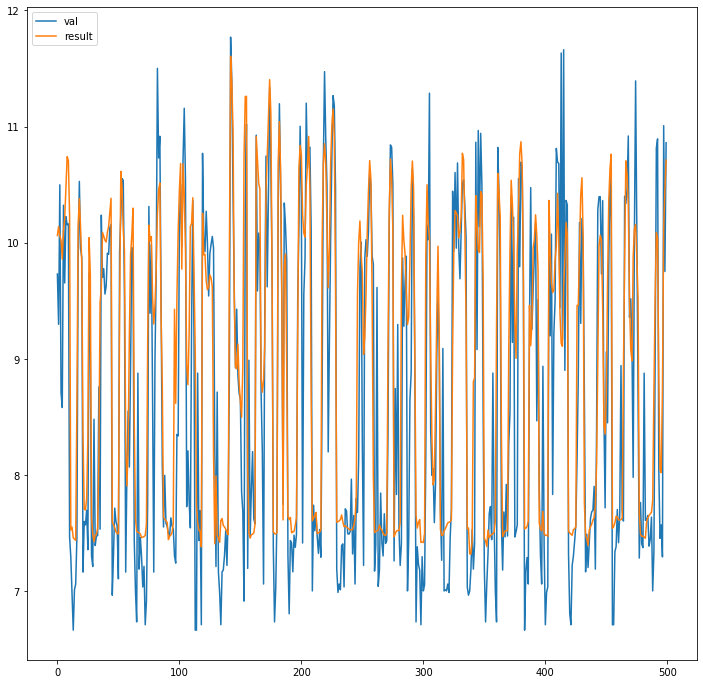

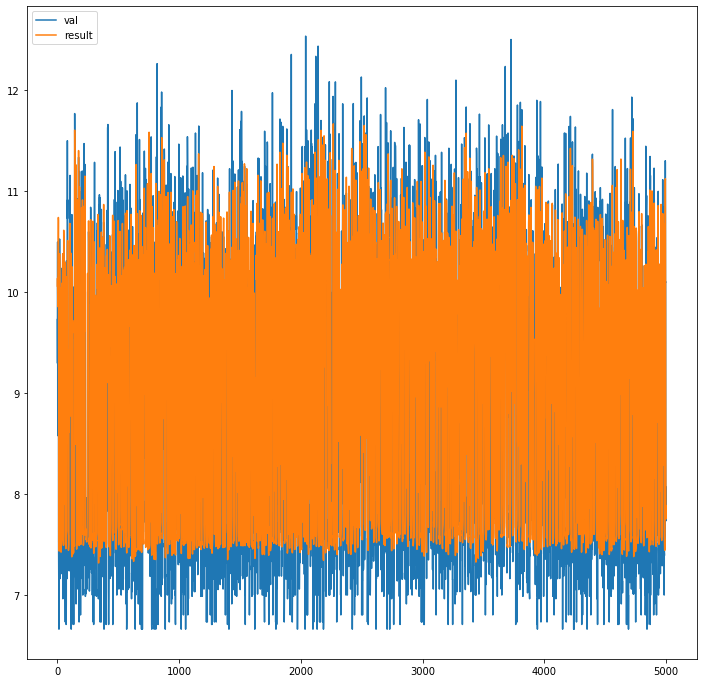

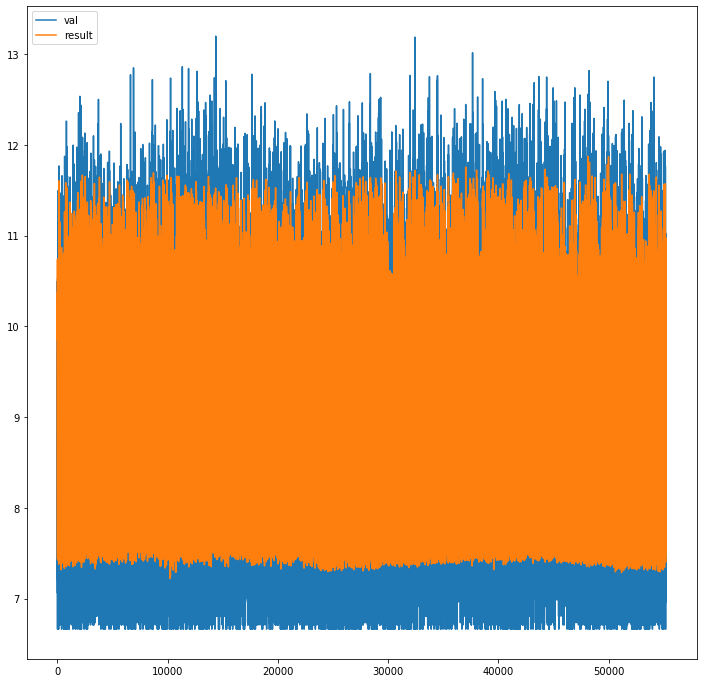

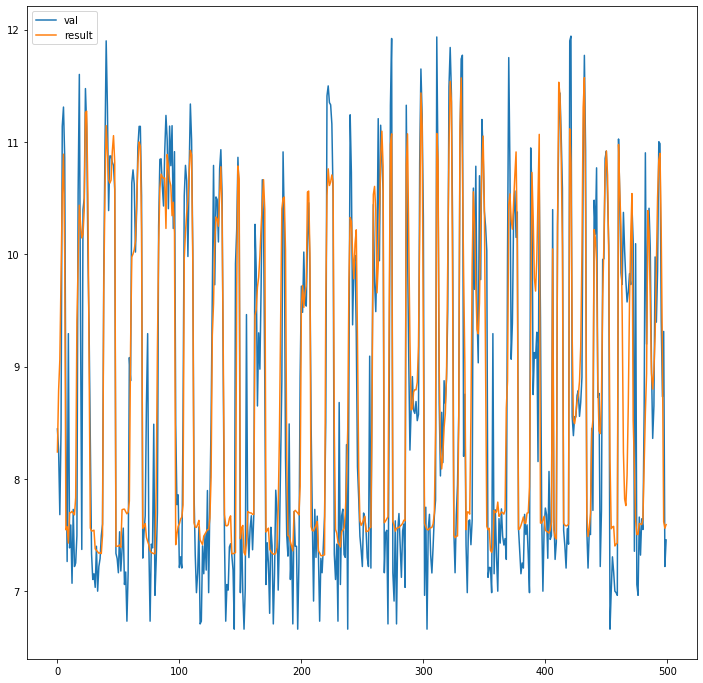

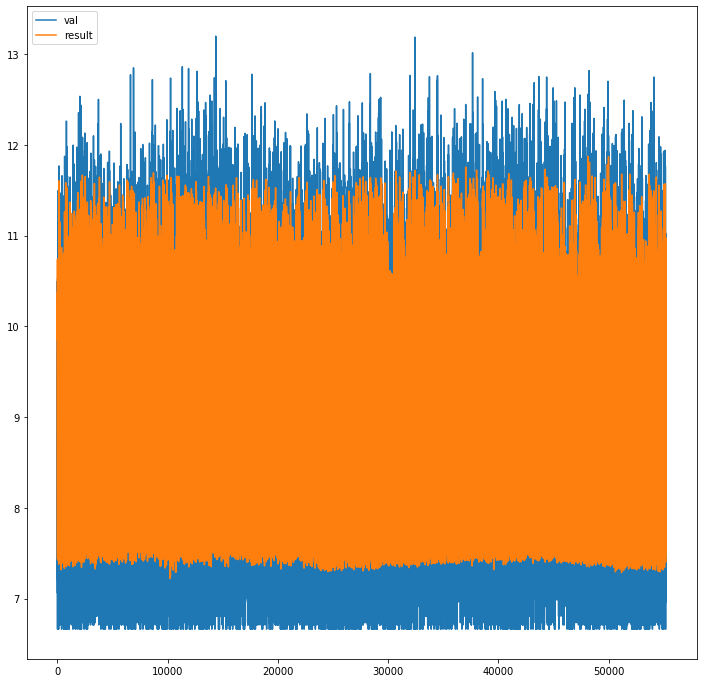

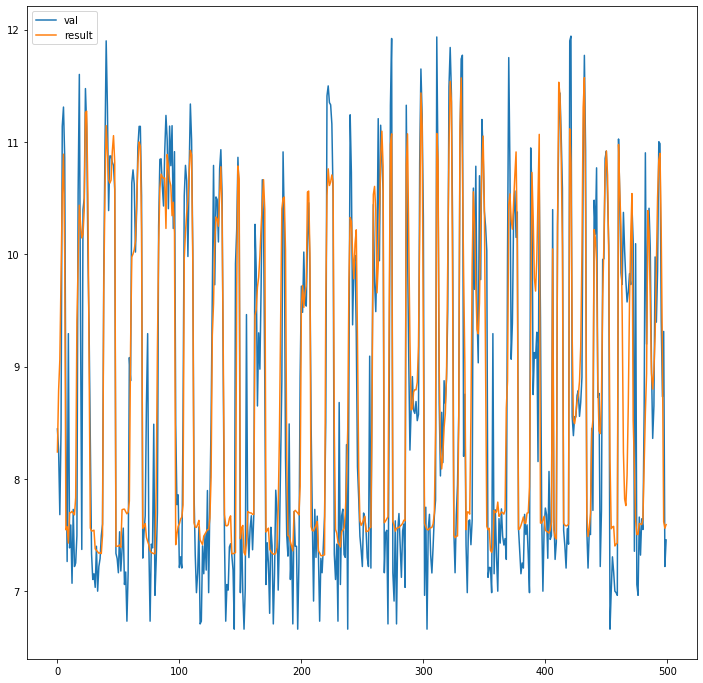

In [27]:
results = model.predict(X_val_scaled)#, y_val_log.values)#, batch_size=128)


plt.figure(figsize=(12,12))
plt.plot(y_val_log.values[:500])
plt.plot(results[:500])
plt.legend(['val', 'result'], loc='upper left')
plt.show()

plt.figure(figsize=(12,12))
plt.plot(y_val_log.values[:5000])
plt.plot(results[:5000])
plt.legend(['val', 'result'], loc='upper left')
plt.show()

plt.figure(figsize=(12,12))
plt.plot(y_val_log.values[:])
plt.plot(results[:])
plt.legend(['val', 'result'], loc='upper left')
plt.show()

plt.figure(figsize=(12,12))
plt.plot(y_val_log.values[-500:])
plt.plot(results[-500:])
plt.legend(['val', 'result'], loc='upper left')
plt.show()

plt.figure(figsize=(12,12))
plt.plot(y_val_log.values[:])
plt.plot(results[:])
plt.legend(['val', 'result'], loc='upper left')
plt.show()

plt.figure(figsize=(12,12))
plt.plot(y_val_log.values[-500:])
plt.plot(results[-500:])
plt.legend(['val', 'result'], loc='upper left')
plt.show()

# Now with the supervised auroral type values and the predicted (unsupervised) type values as a new column in the input X, predict the scalar energy flux y

# The target Y is now a vector result where the true value only has one of the three as non-zero, the correct answer is specified by the auroral region type, equatorial region, in aurora, and the polar region

# The loss is the MSE of all three, to compare this loss to the previous approach that is signal modal, multiply the loss by the number of modes which is three

(array([174354.,      0.,      0.,      0.,      0., 362529.,      0.,
             0.,      0., 185016.]),
 array([1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4, 2.6, 2.8, 3. ]),
 <a list of 10 Patch objects>)

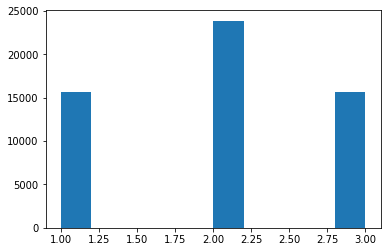

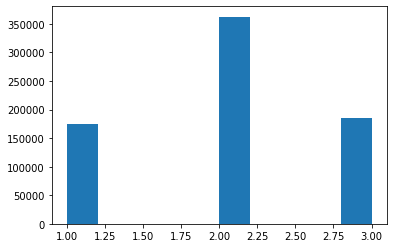

In [28]:

# Construct X and y
feature_cols = [c for c in df_train_new.columns if not 'ELE' in c]
X_val = df_val_new[feature_cols].copy(deep=True)
y_val = df_val_new['ELE_TOTAL_ENERGY_FLUX'].copy(deep=True)
X_train = df_train_new[feature_cols].copy(deep=True)
y_train_val = df_train_new['ELE_TOTAL_ENERGY_FLUX'].copy(deep=True)

y_train[y_train == 0] = 0.0001
y_val[y_val == 0] = 0.0001
y_train_log1 = np.log10(y_train.copy(deep=True))
y_val_log1 = np.log10(y_val.copy(deep=True))

y_train_log = np.zeros((y_train_log1.values.shape[0],3))
y_val_log = np.zeros((y_val_log1.values.shape[0],3))

for i in range(0,X_val.values.shape[0]):
    if X_val['aurora_type'].values[i] == 1:
        y_val_log[i,0]=y_val_log1.values[i]
    if X_val['aurora_type'].values[i] == 2:
        y_val_log[i,1]=y_val_log1.values[i]
    if X_val['aurora_type'].values[i] == 3:
        y_val_log[i,2]=y_val_log1.values[i]
for i in range(0,X_train.values.shape[0]):
    if X_train['aurora_type'].values[i] == 1:
        y_train_log[i,0]=y_train_log1.values[i]
    if X_train['aurora_type'].values[i] == 2:
        y_train_log[i,1]=y_train_log1.values[i]
    if X_train['aurora_type'].values[i] == 3:
        y_train_log[i,2]=y_train_log1.values[i]



scaler_X = preprocessing.RobustScaler()
scaler_X = scaler_X.fit(X_train.values)
X_val_scaled = scaler_X.transform(X_val.values)
X_train_scaled = scaler_X.transform(X_train.values)

X = np.array(X_train_scaled, dtype=np.float32)
X_test = np.array(X_val_scaled, dtype=np.float32)

plt.figure()
plt.hist(X_val['aurora_type'].values)
plt.figure()
plt.hist(X_train['aurora_type'].values)

In [29]:
model = Sequential()

model.add(Dense(int(256), activation='relu'))
model.add(Dropout(.5))
model.add(Dense(64, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(3))


#compile model using accuracy to measure model performance
model.compile(loss='mse', optimizer='adam',  metrics=['mse'])

history = model.fit(X, np.array(y_train_log), validation_data=(X_test, np.array(y_val_log)), batch_size=1024,epochs=1000)

Epoch 1/1000
705/705 [==============================] - 2s 2ms/step - loss: 5.6788 - mse: 5.6788 - val_loss: 0.4422 - val_mse: 0.4422
Epoch 2/1000
705/705 [==============================] - 2s 2ms/step - loss: 0.7128 - mse: 0.7128 - val_loss: 0.3189 - val_mse: 0.3189
Epoch 3/1000
705/705 [==============================] - 2s 2ms/step - loss: 0.4505 - mse: 0.4505 - val_loss: 0.2882 - val_mse: 0.2882
Epoch 4/1000
705/705 [==============================] - 2s 2ms/step - loss: 0.3474 - mse: 0.3474 - val_loss: 0.2800 - val_mse: 0.2800
Epoch 5/1000
705/705 [==============================] - 2s 2ms/step - loss: 0.2926 - mse: 0.2926 - val_loss: 0.2686 - val_mse: 0.2686
Epoch 6/1000
705/705 [==============================] - 2s 3ms/step - loss: 0.2588 - mse: 0.2588 - val_loss: 0.2667 - val_mse: 0.2667
Epoch 7/1000
705/705 [==============================] - 2s 2ms/step - loss: 0.2395 - mse: 0.2395 - val_loss: 0.2454 - val_mse: 0.2454
Epoch 8/1000
705/705 [==============================] - 2s 2ms

Epoch 62/1000
705/705 [==============================] - 2s 2ms/step - loss: 0.1646 - mse: 0.1646 - val_loss: 0.1982 - val_mse: 0.1982
Epoch 63/1000
705/705 [==============================] - 2s 2ms/step - loss: 0.1649 - mse: 0.1649 - val_loss: 0.1983 - val_mse: 0.1983
Epoch 64/1000
705/705 [==============================] - 2s 2ms/step - loss: 0.1663 - mse: 0.1663 - val_loss: 0.1994 - val_mse: 0.1994
Epoch 65/1000
705/705 [==============================] - 2s 3ms/step - loss: 0.1670 - mse: 0.1670 - val_loss: 0.2009 - val_mse: 0.2009
Epoch 66/1000
705/705 [==============================] - 2s 2ms/step - loss: 0.1650 - mse: 0.1650 - val_loss: 0.1983 - val_mse: 0.1983
Epoch 67/1000
705/705 [==============================] - 2s 3ms/step - loss: 0.1692 - mse: 0.1692 - val_loss: 0.1974 - val_mse: 0.1974
Epoch 68/1000
705/705 [==============================] - 2s 3ms/step - loss: 0.1643 - mse: 0.1643 - val_loss: 0.1988 - val_mse: 0.1988
Epoch 69/1000
705/705 [==============================] 

705/705 [==============================] - 2s 2ms/step - loss: 0.1571 - mse: 0.1571 - val_loss: 0.1988 - val_mse: 0.1988
Epoch 123/1000
705/705 [==============================] - 2s 2ms/step - loss: 0.1579 - mse: 0.1579 - val_loss: 0.1964 - val_mse: 0.1964
Epoch 124/1000
705/705 [==============================] - 2s 2ms/step - loss: 0.1580 - mse: 0.1580 - val_loss: 0.1946 - val_mse: 0.1946
Epoch 125/1000
705/705 [==============================] - 2s 2ms/step - loss: 0.1561 - mse: 0.1561 - val_loss: 0.1955 - val_mse: 0.1955
Epoch 126/1000
705/705 [==============================] - 2s 2ms/step - loss: 0.1577 - mse: 0.1577 - val_loss: 0.1927 - val_mse: 0.1927
Epoch 127/1000
705/705 [==============================] - 2s 2ms/step - loss: 0.1700 - mse: 0.1700 - val_loss: 0.1945 - val_mse: 0.1945
Epoch 128/1000
705/705 [==============================] - 2s 3ms/step - loss: 0.1564 - mse: 0.1564 - val_loss: 0.1970 - val_mse: 0.1970
Epoch 129/1000
705/705 [==============================] - 2s 3m

705/705 [==============================] - 2s 2ms/step - loss: 0.1539 - mse: 0.1539 - val_loss: 0.1933 - val_mse: 0.1933
Epoch 183/1000
705/705 [==============================] - 2s 2ms/step - loss: 0.1531 - mse: 0.1531 - val_loss: 0.1972 - val_mse: 0.1972
Epoch 184/1000
705/705 [==============================] - 2s 2ms/step - loss: 0.1550 - mse: 0.1550 - val_loss: 0.1926 - val_mse: 0.1926
Epoch 185/1000
705/705 [==============================] - 2s 2ms/step - loss: 0.1545 - mse: 0.1545 - val_loss: 0.1933 - val_mse: 0.1933
Epoch 186/1000
705/705 [==============================] - 2s 2ms/step - loss: 0.1545 - mse: 0.1545 - val_loss: 0.1941 - val_mse: 0.1941
Epoch 187/1000
705/705 [==============================] - 2s 2ms/step - loss: 0.1527 - mse: 0.1527 - val_loss: 0.1935 - val_mse: 0.1935
Epoch 188/1000
705/705 [==============================] - 2s 2ms/step - loss: 0.1522 - mse: 0.1522 - val_loss: 0.1936 - val_mse: 0.1936
Epoch 189/1000
705/705 [==============================] - 2s 3m

705/705 [==============================] - 2s 2ms/step - loss: 0.1507 - mse: 0.1507 - val_loss: 0.1940 - val_mse: 0.1940
Epoch 243/1000
705/705 [==============================] - 2s 2ms/step - loss: 0.1523 - mse: 0.1523 - val_loss: 0.1940 - val_mse: 0.1940
Epoch 244/1000
705/705 [==============================] - 2s 2ms/step - loss: 0.1526 - mse: 0.1526 - val_loss: 0.1944 - val_mse: 0.1944
Epoch 245/1000
705/705 [==============================] - 2s 2ms/step - loss: 0.1515 - mse: 0.1515 - val_loss: 0.1915 - val_mse: 0.1915
Epoch 246/1000
705/705 [==============================] - 2s 2ms/step - loss: 0.1502 - mse: 0.1502 - val_loss: 0.1941 - val_mse: 0.1941
Epoch 247/1000
705/705 [==============================] - 2s 2ms/step - loss: 0.1526 - mse: 0.1526 - val_loss: 0.1941 - val_mse: 0.1941
Epoch 248/1000
705/705 [==============================] - 2s 2ms/step - loss: 0.1530 - mse: 0.1530 - val_loss: 0.1950 - val_mse: 0.1950
Epoch 249/1000
705/705 [==============================] - 2s 2m

705/705 [==============================] - 2s 2ms/step - loss: 0.1506 - mse: 0.1506 - val_loss: 0.1927 - val_mse: 0.1927
Epoch 303/1000
705/705 [==============================] - 2s 2ms/step - loss: 0.1499 - mse: 0.1499 - val_loss: 0.1906 - val_mse: 0.1906
Epoch 304/1000
705/705 [==============================] - 2s 2ms/step - loss: 0.1497 - mse: 0.1497 - val_loss: 0.1936 - val_mse: 0.1936
Epoch 305/1000
705/705 [==============================] - 2s 2ms/step - loss: 0.1503 - mse: 0.1503 - val_loss: 0.1922 - val_mse: 0.1922
Epoch 306/1000
705/705 [==============================] - 2s 2ms/step - loss: 0.1517 - mse: 0.1517 - val_loss: 0.1915 - val_mse: 0.1915
Epoch 307/1000
705/705 [==============================] - 2s 2ms/step - loss: 0.1504 - mse: 0.1504 - val_loss: 0.1929 - val_mse: 0.1929
Epoch 308/1000
705/705 [==============================] - 2s 2ms/step - loss: 0.1503 - mse: 0.1503 - val_loss: 0.1912 - val_mse: 0.1912
Epoch 309/1000
705/705 [==============================] - 2s 2m

705/705 [==============================] - 2s 2ms/step - loss: 0.1477 - mse: 0.1477 - val_loss: 0.1932 - val_mse: 0.1932
Epoch 363/1000
705/705 [==============================] - 2s 2ms/step - loss: 0.1501 - mse: 0.1501 - val_loss: 0.1923 - val_mse: 0.1923
Epoch 364/1000
705/705 [==============================] - 2s 2ms/step - loss: 0.1517 - mse: 0.1517 - val_loss: 0.1915 - val_mse: 0.1915
Epoch 365/1000
705/705 [==============================] - 2s 2ms/step - loss: 0.1495 - mse: 0.1495 - val_loss: 0.1913 - val_mse: 0.1913
Epoch 366/1000
705/705 [==============================] - 2s 2ms/step - loss: 0.1508 - mse: 0.1508 - val_loss: 0.1934 - val_mse: 0.1934
Epoch 367/1000
705/705 [==============================] - 2s 2ms/step - loss: 0.1495 - mse: 0.1495 - val_loss: 0.1904 - val_mse: 0.1904
Epoch 368/1000
705/705 [==============================] - 2s 2ms/step - loss: 0.1513 - mse: 0.1513 - val_loss: 0.1924 - val_mse: 0.1924
Epoch 369/1000
705/705 [==============================] - 2s 2m

705/705 [==============================] - 2s 3ms/step - loss: 0.1487 - mse: 0.1487 - val_loss: 0.1930 - val_mse: 0.1930
Epoch 423/1000
705/705 [==============================] - 2s 2ms/step - loss: 0.1499 - mse: 0.1499 - val_loss: 0.1898 - val_mse: 0.1898
Epoch 424/1000
705/705 [==============================] - 2s 2ms/step - loss: 0.1481 - mse: 0.1481 - val_loss: 0.1924 - val_mse: 0.1924
Epoch 425/1000
705/705 [==============================] - 2s 2ms/step - loss: 0.1489 - mse: 0.1489 - val_loss: 0.1925 - val_mse: 0.1925
Epoch 426/1000
705/705 [==============================] - 2s 2ms/step - loss: 0.1488 - mse: 0.1488 - val_loss: 0.1912 - val_mse: 0.1912
Epoch 427/1000
705/705 [==============================] - 2s 3ms/step - loss: 0.1503 - mse: 0.1503 - val_loss: 0.1921 - val_mse: 0.1921
Epoch 428/1000
705/705 [==============================] - 2s 2ms/step - loss: 0.1490 - mse: 0.1490 - val_loss: 0.1921 - val_mse: 0.1921
Epoch 429/1000
705/705 [==============================] - 2s 2m

705/705 [==============================] - 2s 2ms/step - loss: 0.1471 - mse: 0.1471 - val_loss: 0.1922 - val_mse: 0.1922
Epoch 483/1000
705/705 [==============================] - 2s 2ms/step - loss: 0.1464 - mse: 0.1464 - val_loss: 0.1907 - val_mse: 0.1907
Epoch 484/1000
705/705 [==============================] - 2s 2ms/step - loss: 0.1485 - mse: 0.1485 - val_loss: 0.1924 - val_mse: 0.1924
Epoch 485/1000
705/705 [==============================] - 2s 2ms/step - loss: 0.1468 - mse: 0.1468 - val_loss: 0.1911 - val_mse: 0.1911
Epoch 486/1000
705/705 [==============================] - 2s 2ms/step - loss: 0.1475 - mse: 0.1475 - val_loss: 0.1905 - val_mse: 0.1905
Epoch 487/1000
705/705 [==============================] - 2s 2ms/step - loss: 0.1479 - mse: 0.1479 - val_loss: 0.1909 - val_mse: 0.1909
Epoch 488/1000
705/705 [==============================] - 2s 2ms/step - loss: 0.1462 - mse: 0.1462 - val_loss: 0.1936 - val_mse: 0.1936
Epoch 489/1000
705/705 [==============================] - 2s 2m

705/705 [==============================] - 2s 2ms/step - loss: 0.1463 - mse: 0.1463 - val_loss: 0.1902 - val_mse: 0.1902
Epoch 543/1000
705/705 [==============================] - 2s 2ms/step - loss: 0.1460 - mse: 0.1460 - val_loss: 0.1904 - val_mse: 0.1904
Epoch 544/1000
705/705 [==============================] - 2s 2ms/step - loss: 0.1464 - mse: 0.1464 - val_loss: 0.1924 - val_mse: 0.1924
Epoch 545/1000
705/705 [==============================] - 2s 2ms/step - loss: 0.1476 - mse: 0.1476 - val_loss: 0.1905 - val_mse: 0.1905
Epoch 546/1000
705/705 [==============================] - 2s 2ms/step - loss: 0.1466 - mse: 0.1466 - val_loss: 0.1912 - val_mse: 0.1912
Epoch 547/1000
705/705 [==============================] - 2s 2ms/step - loss: 0.1460 - mse: 0.1460 - val_loss: 0.1916 - val_mse: 0.1916
Epoch 548/1000
705/705 [==============================] - 2s 2ms/step - loss: 0.1478 - mse: 0.1478 - val_loss: 0.1907 - val_mse: 0.1907
Epoch 549/1000
705/705 [==============================] - 2s 2m

705/705 [==============================] - 1s 2ms/step - loss: 0.1456 - mse: 0.1456 - val_loss: 0.1906 - val_mse: 0.1906
Epoch 603/1000
705/705 [==============================] - 1s 2ms/step - loss: 0.1464 - mse: 0.1464 - val_loss: 0.1902 - val_mse: 0.1902
Epoch 604/1000
705/705 [==============================] - 1s 2ms/step - loss: 0.1458 - mse: 0.1458 - val_loss: 0.1917 - val_mse: 0.1917
Epoch 605/1000
705/705 [==============================] - 2s 2ms/step - loss: 0.1453 - mse: 0.1453 - val_loss: 0.1912 - val_mse: 0.1912
Epoch 606/1000
705/705 [==============================] - 1s 2ms/step - loss: 0.1459 - mse: 0.1459 - val_loss: 0.1903 - val_mse: 0.1903
Epoch 607/1000
705/705 [==============================] - 1s 2ms/step - loss: 0.1467 - mse: 0.1467 - val_loss: 0.1913 - val_mse: 0.1913
Epoch 608/1000
705/705 [==============================] - 1s 2ms/step - loss: 0.1459 - mse: 0.1459 - val_loss: 0.1904 - val_mse: 0.1904
Epoch 609/1000
705/705 [==============================] - 1s 2m

705/705 [==============================] - 2s 2ms/step - loss: 0.1462 - mse: 0.1462 - val_loss: 0.1907 - val_mse: 0.1907
Epoch 663/1000
705/705 [==============================] - 2s 2ms/step - loss: 0.1464 - mse: 0.1464 - val_loss: 0.1903 - val_mse: 0.1903
Epoch 664/1000
705/705 [==============================] - 2s 2ms/step - loss: 0.1462 - mse: 0.1462 - val_loss: 0.1905 - val_mse: 0.1905
Epoch 665/1000
705/705 [==============================] - 2s 2ms/step - loss: 0.1452 - mse: 0.1452 - val_loss: 0.1909 - val_mse: 0.1909
Epoch 666/1000
705/705 [==============================] - 2s 2ms/step - loss: 0.1460 - mse: 0.1460 - val_loss: 0.1912 - val_mse: 0.1912
Epoch 667/1000
705/705 [==============================] - 2s 2ms/step - loss: 0.1445 - mse: 0.1445 - val_loss: 0.1904 - val_mse: 0.1904
Epoch 668/1000
705/705 [==============================] - 2s 2ms/step - loss: 0.1452 - mse: 0.1452 - val_loss: 0.1915 - val_mse: 0.1915
Epoch 669/1000
705/705 [==============================] - 2s 2m

705/705 [==============================] - 1s 2ms/step - loss: 0.1468 - mse: 0.1468 - val_loss: 0.1898 - val_mse: 0.1898
Epoch 723/1000
705/705 [==============================] - 1s 2ms/step - loss: 0.1451 - mse: 0.1451 - val_loss: 0.1905 - val_mse: 0.1905
Epoch 724/1000
705/705 [==============================] - 1s 2ms/step - loss: 0.1460 - mse: 0.1460 - val_loss: 0.1901 - val_mse: 0.1901
Epoch 725/1000
705/705 [==============================] - 1s 2ms/step - loss: 0.1456 - mse: 0.1456 - val_loss: 0.1895 - val_mse: 0.1895
Epoch 726/1000
705/705 [==============================] - 2s 2ms/step - loss: 0.1455 - mse: 0.1455 - val_loss: 0.1897 - val_mse: 0.1897
Epoch 727/1000
705/705 [==============================] - 2s 2ms/step - loss: 0.1453 - mse: 0.1453 - val_loss: 0.1900 - val_mse: 0.1900
Epoch 728/1000
705/705 [==============================] - 1s 2ms/step - loss: 0.1451 - mse: 0.1451 - val_loss: 0.1903 - val_mse: 0.1903
Epoch 729/1000
705/705 [==============================] - 1s 2m

705/705 [==============================] - 2s 2ms/step - loss: 0.1447 - mse: 0.1447 - val_loss: 0.1904 - val_mse: 0.1904
Epoch 783/1000
705/705 [==============================] - 2s 2ms/step - loss: 0.1446 - mse: 0.1446 - val_loss: 0.1915 - val_mse: 0.1915
Epoch 784/1000
705/705 [==============================] - 2s 2ms/step - loss: 0.1452 - mse: 0.1452 - val_loss: 0.1900 - val_mse: 0.1900
Epoch 785/1000
705/705 [==============================] - 2s 2ms/step - loss: 0.1450 - mse: 0.1450 - val_loss: 0.1896 - val_mse: 0.1896
Epoch 786/1000
705/705 [==============================] - 2s 2ms/step - loss: 0.1449 - mse: 0.1449 - val_loss: 0.1899 - val_mse: 0.1899
Epoch 787/1000
705/705 [==============================] - 2s 2ms/step - loss: 0.1458 - mse: 0.1458 - val_loss: 0.1901 - val_mse: 0.1901
Epoch 788/1000
705/705 [==============================] - 2s 2ms/step - loss: 0.1448 - mse: 0.1448 - val_loss: 0.1919 - val_mse: 0.1919
Epoch 789/1000
705/705 [==============================] - 2s 2m

705/705 [==============================] - 2s 2ms/step - loss: 0.1440 - mse: 0.1440 - val_loss: 0.1896 - val_mse: 0.1896
Epoch 843/1000
705/705 [==============================] - 2s 2ms/step - loss: 0.1444 - mse: 0.1444 - val_loss: 0.1918 - val_mse: 0.1918
Epoch 844/1000
705/705 [==============================] - 2s 2ms/step - loss: 0.1447 - mse: 0.1447 - val_loss: 0.1918 - val_mse: 0.1918
Epoch 845/1000
705/705 [==============================] - 2s 2ms/step - loss: 0.1452 - mse: 0.1452 - val_loss: 0.1912 - val_mse: 0.1912
Epoch 846/1000
705/705 [==============================] - 2s 2ms/step - loss: 0.1446 - mse: 0.1446 - val_loss: 0.1901 - val_mse: 0.1901
Epoch 847/1000
705/705 [==============================] - 2s 2ms/step - loss: 0.1443 - mse: 0.1443 - val_loss: 0.1908 - val_mse: 0.1908
Epoch 848/1000
705/705 [==============================] - 2s 2ms/step - loss: 0.1439 - mse: 0.1439 - val_loss: 0.1894 - val_mse: 0.1894
Epoch 849/1000
705/705 [==============================] - 2s 2m

705/705 [==============================] - 1s 2ms/step - loss: 0.1451 - mse: 0.1451 - val_loss: 0.1911 - val_mse: 0.1911
Epoch 903/1000
705/705 [==============================] - 1s 2ms/step - loss: 0.1440 - mse: 0.1440 - val_loss: 0.1920 - val_mse: 0.1920
Epoch 904/1000
705/705 [==============================] - 1s 2ms/step - loss: 0.1439 - mse: 0.1439 - val_loss: 0.1908 - val_mse: 0.1908
Epoch 905/1000
705/705 [==============================] - 1s 2ms/step - loss: 0.1436 - mse: 0.1436 - val_loss: 0.1912 - val_mse: 0.1912
Epoch 906/1000
705/705 [==============================] - 1s 2ms/step - loss: 0.1446 - mse: 0.1446 - val_loss: 0.1897 - val_mse: 0.1897
Epoch 907/1000
705/705 [==============================] - 2s 2ms/step - loss: 0.1459 - mse: 0.1459 - val_loss: 0.1913 - val_mse: 0.1913
Epoch 908/1000
705/705 [==============================] - 1s 2ms/step - loss: 0.1455 - mse: 0.1455 - val_loss: 0.1897 - val_mse: 0.1897
Epoch 909/1000
705/705 [==============================] - 1s 2m

705/705 [==============================] - 1s 2ms/step - loss: 0.1440 - mse: 0.1440 - val_loss: 0.1914 - val_mse: 0.1914
Epoch 963/1000
705/705 [==============================] - 1s 2ms/step - loss: 0.1440 - mse: 0.1440 - val_loss: 0.1927 - val_mse: 0.1927
Epoch 964/1000
705/705 [==============================] - 1s 2ms/step - loss: 0.1438 - mse: 0.1438 - val_loss: 0.1898 - val_mse: 0.1898
Epoch 965/1000
705/705 [==============================] - 1s 2ms/step - loss: 0.1438 - mse: 0.1438 - val_loss: 0.1912 - val_mse: 0.1912
Epoch 966/1000
705/705 [==============================] - 1s 2ms/step - loss: 0.1439 - mse: 0.1439 - val_loss: 0.1906 - val_mse: 0.1906
Epoch 967/1000
705/705 [==============================] - 1s 2ms/step - loss: 0.1453 - mse: 0.1453 - val_loss: 0.1911 - val_mse: 0.1911
Epoch 968/1000
705/705 [==============================] - 1s 2ms/step - loss: 0.1445 - mse: 0.1445 - val_loss: 0.1904 - val_mse: 0.1904
Epoch 969/1000
705/705 [==============================] - 2s 2m

In [30]:
filename = 'best_with_auroral_region4'

model.save(filename)
model.save_weights('my_model_weights2.h5')

dict_keys(['loss', 'mse', 'val_loss', 'val_mse'])


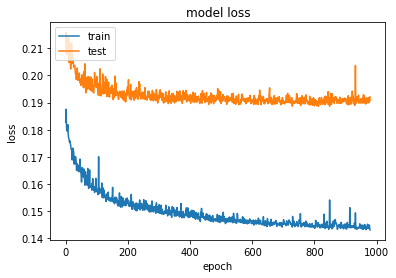

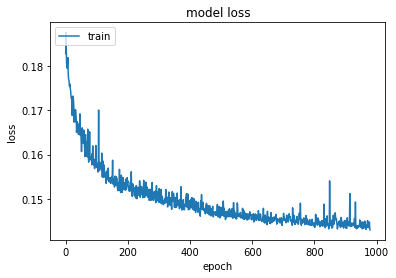

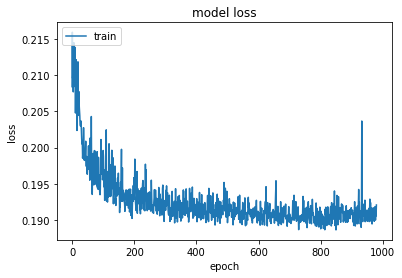

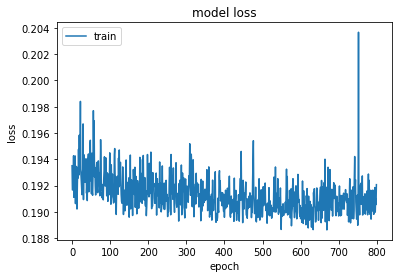

In [31]:
filename = 'best_with_auroral_region4'

model = tensorflow.keras.models.load_model(filename)



print(history.history.keys())
plt.figure()
# summarize history for loss
plt.plot(history.history['loss'][20:])
plt.plot(history.history['val_loss'][20:])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.figure()
# summarize history for loss
plt.plot(history.history['loss'][20:])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.figure()
# summarize history for loss
plt.plot(history.history['val_loss'][20:])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.figure()
# summarize history for loss
plt.plot(history.history['val_loss'][200:])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

55210
(55210,)


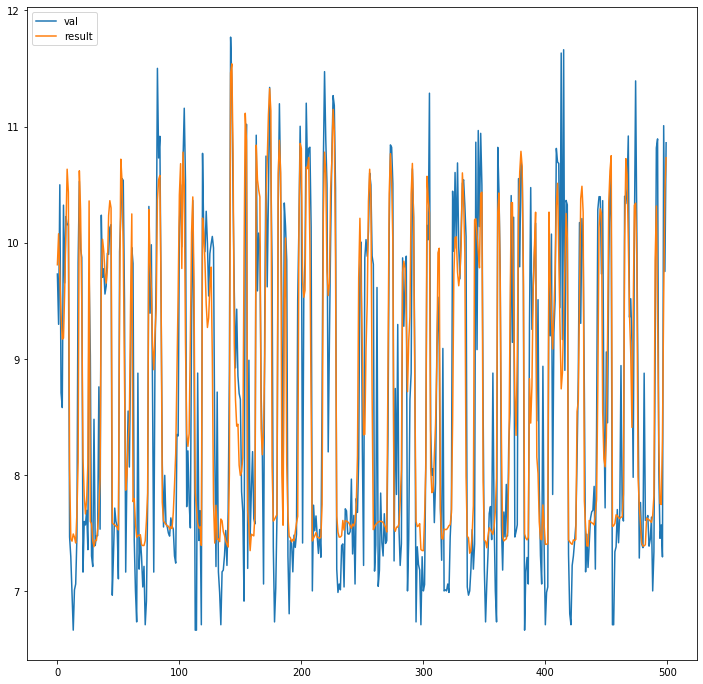

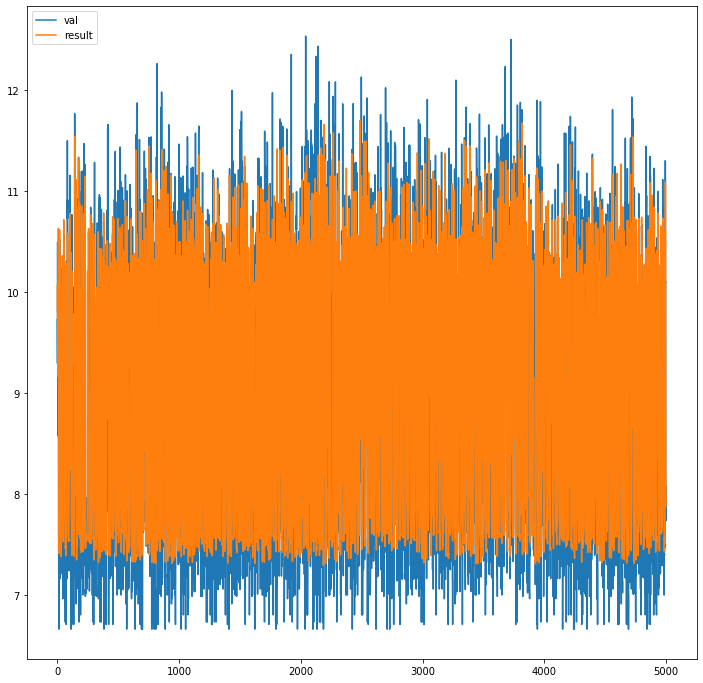

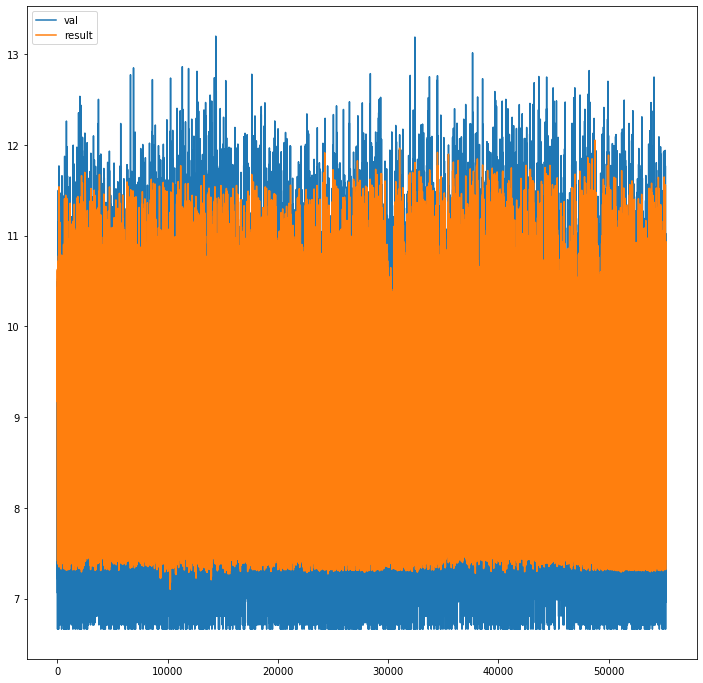

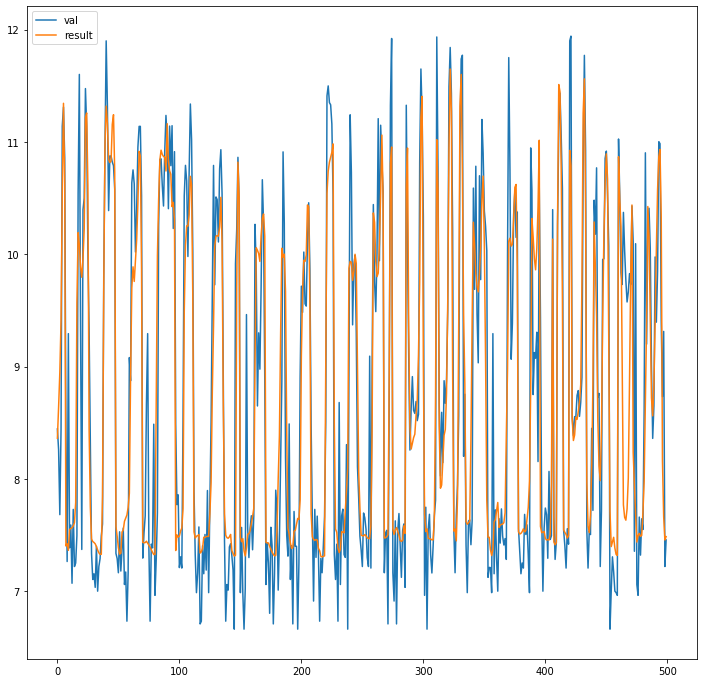

In [32]:
results1 = model.predict(X_val_scaled)#, y_val_log.values)#, batch_size=128)
print(results1.shape[0])
results = np.zeros((results1.shape[0]))
y = np.zeros((results1.shape[0]))
print(y.shape)
for i in range(0,results1.shape[0]):
    results[i]= np.max(results1[i,:])
    y[i] = np.max(y_val_log[i,:])
    
plt.figure(figsize=(12,12))
plt.plot(y[:500])
plt.plot(results[:500])
plt.legend(['val', 'result'], loc='upper left')
plt.show()

plt.figure(figsize=(12,12))
plt.plot(y[:5000])
plt.plot(results[:5000])
plt.legend(['val', 'result'], loc='upper left')
plt.show()

plt.figure(figsize=(12,12))
plt.plot(y[:])
plt.plot(results[:])
plt.legend(['val', 'result'], loc='upper left')
plt.show()

plt.figure(figsize=(12,12))
plt.plot(y[-500:])
plt.plot(results[-500:])
plt.legend(['val', 'result'], loc='upper left')
plt.show()

In [33]:
mse_final = np.average((results-y)**2)
print(mse_final)

0.5756927987743807


# Trying Multi-modal without auroral region type as input for X
(but still using the auroal type to specify y_train and y_val for which of the three modes it is in)

In [34]:
feature_cols = [c for c in X_val.columns if not 'aurora_type' in c]
X_val = X_val[feature_cols].copy(deep=True)
X_train = X_train[feature_cols].copy(deep=True)

scaler_X = preprocessing.RobustScaler()
scaler_X = scaler_X.fit(X_train.values)
X_val_scaled = scaler_X.transform(X_val.values)
X_train_scaled = scaler_X.transform(X_train.values)

X = np.array(X_train_scaled, dtype=np.float32)
X_test = np.array(X_val_scaled, dtype=np.float32)


In [35]:
model = Sequential()

model.add(Dense(int(256), activation='relu'))
#model.add(Dropout(.5))
#model.add(Dense(64, activation='relu'))
#model.add(Dense(16, activation='relu'))
model.add(Dense(3))


#compile model using accuracy to measure model performance
model.compile(loss='mse', optimizer='adam',  metrics=['mse'])

history = model.fit(X, np.array(y_train_log), validation_data=(X_test, np.array(y_val_log)), batch_size=1024,epochs=100)

Epoch 1/100
705/705 [==============================] - 1s 2ms/step - loss: 12.3197 - mse: 12.3197 - val_loss: 9.8404 - val_mse: 9.8404
Epoch 2/100
705/705 [==============================] - 1s 2ms/step - loss: 8.4534 - mse: 8.4534 - val_loss: 7.7964 - val_mse: 7.7964
Epoch 3/100
705/705 [==============================] - 1s 2ms/step - loss: 7.3517 - mse: 7.3517 - val_loss: 7.0938 - val_mse: 7.0938
Epoch 4/100
705/705 [==============================] - 1s 2ms/step - loss: 6.8279 - mse: 6.8279 - val_loss: 6.6182 - val_mse: 6.6182
Epoch 5/100
705/705 [==============================] - 1s 2ms/step - loss: 6.4884 - mse: 6.4884 - val_loss: 6.0238 - val_mse: 6.0238
Epoch 6/100
705/705 [==============================] - 1s 2ms/step - loss: 5.6954 - mse: 5.6954 - val_loss: 5.7830 - val_mse: 5.7830
Epoch 7/100
705/705 [==============================] - 1s 2ms/step - loss: 5.6296 - mse: 5.6296 - val_loss: 5.5494 - val_mse: 5.5494
Epoch 8/100
705/705 [==============================] - 1s 2ms/step 

705/705 [==============================] - 1s 2ms/step - loss: 4.1448 - mse: 4.1448 - val_loss: 4.6783 - val_mse: 4.6783
Epoch 63/100
705/705 [==============================] - 1s 2ms/step - loss: 4.1279 - mse: 4.1279 - val_loss: 4.7612 - val_mse: 4.7612
Epoch 64/100
705/705 [==============================] - 1s 2ms/step - loss: 4.1609 - mse: 4.1609 - val_loss: 4.7458 - val_mse: 4.7458
Epoch 65/100
705/705 [==============================] - 1s 2ms/step - loss: 4.1451 - mse: 4.1451 - val_loss: 4.8320 - val_mse: 4.8320
Epoch 66/100
705/705 [==============================] - 1s 2ms/step - loss: 4.1432 - mse: 4.1432 - val_loss: 4.7350 - val_mse: 4.7350
Epoch 67/100
705/705 [==============================] - 1s 2ms/step - loss: 4.0877 - mse: 4.0877 - val_loss: 4.7202 - val_mse: 4.7202
Epoch 68/100
705/705 [==============================] - 1s 2ms/step - loss: 4.1634 - mse: 4.1634 - val_loss: 4.6870 - val_mse: 4.6870
Epoch 69/100
705/705 [==============================] - 1s 2ms/step - loss:

In [43]:
model = Sequential()

model.add(Dense(int(256), activation='relu'))
model.add(Dropout(.5))
model.add(Dense(64, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(3))


#compile model using accuracy to measure model performance
model.compile(loss='mse', optimizer='adam',  metrics=['mse'])

history = model.fit(X, np.array(y_train_log), validation_data=(X_test, np.array(y_val_log)), batch_size=1024,epochs=1000)

Epoch 1/1000
705/705 [==============================] - 1s 2ms/step - loss: 15.1856 - mse: 15.1856 - val_loss: 9.9423 - val_mse: 9.9423
Epoch 2/1000
705/705 [==============================] - 1s 2ms/step - loss: 6.8506 - mse: 6.8506 - val_loss: 5.2907 - val_mse: 5.2907
Epoch 3/1000
705/705 [==============================] - 1s 2ms/step - loss: 5.1204 - mse: 5.1204 - val_loss: 4.7135 - val_mse: 4.7135
Epoch 4/1000
705/705 [==============================] - 1s 2ms/step - loss: 4.7757 - mse: 4.7757 - val_loss: 4.8341 - val_mse: 4.8341
Epoch 5/1000
705/705 [==============================] - 1s 2ms/step - loss: 4.6107 - mse: 4.6107 - val_loss: 4.6190 - val_mse: 4.6190
Epoch 6/1000
705/705 [==============================] - 1s 2ms/step - loss: 4.5004 - mse: 4.5004 - val_loss: 4.6692 - val_mse: 4.6692
Epoch 7/1000
705/705 [==============================] - 1s 2ms/step - loss: 4.4182 - mse: 4.4182 - val_loss: 4.8630 - val_mse: 4.8630
Epoch 8/1000
705/705 [==============================] - 1s 2

Epoch 62/1000
705/705 [==============================] - 2s 2ms/step - loss: 3.7418 - mse: 3.7418 - val_loss: 4.7922 - val_mse: 4.7922
Epoch 63/1000
705/705 [==============================] - 1s 2ms/step - loss: 3.7281 - mse: 3.7281 - val_loss: 4.7641 - val_mse: 4.7641
Epoch 64/1000
705/705 [==============================] - 1s 2ms/step - loss: 3.7340 - mse: 3.7340 - val_loss: 4.6396 - val_mse: 4.6396
Epoch 65/1000
705/705 [==============================] - 1s 2ms/step - loss: 3.7409 - mse: 3.7409 - val_loss: 4.7828 - val_mse: 4.7828
Epoch 66/1000
705/705 [==============================] - 1s 2ms/step - loss: 3.7312 - mse: 3.7312 - val_loss: 4.6565 - val_mse: 4.6565
Epoch 67/1000
705/705 [==============================] - 2s 2ms/step - loss: 3.7260 - mse: 3.7260 - val_loss: 4.7091 - val_mse: 4.7091
Epoch 68/1000
705/705 [==============================] - 2s 3ms/step - loss: 3.7135 - mse: 3.7135 - val_loss: 4.6418 - val_mse: 4.6418
Epoch 69/1000
705/705 [==============================] 

705/705 [==============================] - 1s 2ms/step - loss: 3.6044 - mse: 3.6044 - val_loss: 4.9597 - val_mse: 4.9597
Epoch 123/1000
705/705 [==============================] - 2s 2ms/step - loss: 3.5957 - mse: 3.5957 - val_loss: 4.7782 - val_mse: 4.7782
Epoch 124/1000
705/705 [==============================] - 1s 2ms/step - loss: 3.5895 - mse: 3.5895 - val_loss: 4.7617 - val_mse: 4.7617
Epoch 125/1000
705/705 [==============================] - 2s 2ms/step - loss: 3.5891 - mse: 3.5891 - val_loss: 4.8043 - val_mse: 4.8043
Epoch 126/1000
705/705 [==============================] - 2s 2ms/step - loss: 3.5983 - mse: 3.5983 - val_loss: 4.5718 - val_mse: 4.5718
Epoch 127/1000
705/705 [==============================] - 2s 2ms/step - loss: 3.5796 - mse: 3.5796 - val_loss: 4.5437 - val_mse: 4.5437
Epoch 128/1000
705/705 [==============================] - 2s 2ms/step - loss: 3.5925 - mse: 3.5925 - val_loss: 4.7957 - val_mse: 4.7957
Epoch 129/1000
705/705 [==============================] - 2s 2m

705/705 [==============================] - 2s 2ms/step - loss: 3.5157 - mse: 3.5157 - val_loss: 4.8599 - val_mse: 4.8599
Epoch 183/1000
705/705 [==============================] - 1s 2ms/step - loss: 3.5123 - mse: 3.5123 - val_loss: 4.7727 - val_mse: 4.7727
Epoch 184/1000
705/705 [==============================] - 2s 2ms/step - loss: 3.5134 - mse: 3.5134 - val_loss: 4.6829 - val_mse: 4.6829
Epoch 185/1000
705/705 [==============================] - 2s 2ms/step - loss: 3.5118 - mse: 3.5118 - val_loss: 4.8375 - val_mse: 4.8375
Epoch 186/1000
705/705 [==============================] - 2s 2ms/step - loss: 3.5105 - mse: 3.5105 - val_loss: 4.7484 - val_mse: 4.7484
Epoch 187/1000
705/705 [==============================] - 2s 2ms/step - loss: 3.5168 - mse: 3.5168 - val_loss: 4.7031 - val_mse: 4.7031
Epoch 188/1000
705/705 [==============================] - 2s 2ms/step - loss: 3.5137 - mse: 3.5137 - val_loss: 4.9181 - val_mse: 4.9181
Epoch 189/1000
705/705 [==============================] - 2s 2m

705/705 [==============================] - 2s 2ms/step - loss: 3.4547 - mse: 3.4547 - val_loss: 4.8226 - val_mse: 4.8226
Epoch 243/1000
705/705 [==============================] - 2s 2ms/step - loss: 3.4487 - mse: 3.4487 - val_loss: 4.8312 - val_mse: 4.8312
Epoch 244/1000
705/705 [==============================] - 2s 2ms/step - loss: 3.4655 - mse: 3.4655 - val_loss: 4.8184 - val_mse: 4.8184
Epoch 245/1000
705/705 [==============================] - 2s 2ms/step - loss: 3.4599 - mse: 3.4599 - val_loss: 4.7581 - val_mse: 4.7581
Epoch 246/1000
705/705 [==============================] - 2s 2ms/step - loss: 3.4539 - mse: 3.4539 - val_loss: 4.9947 - val_mse: 4.9947
Epoch 247/1000
705/705 [==============================] - 2s 2ms/step - loss: 3.4546 - mse: 3.4546 - val_loss: 4.7482 - val_mse: 4.7482
Epoch 248/1000
705/705 [==============================] - 1s 2ms/step - loss: 3.4573 - mse: 3.4573 - val_loss: 4.8814 - val_mse: 4.8814
Epoch 249/1000
705/705 [==============================] - 2s 2m

705/705 [==============================] - 2s 2ms/step - loss: 3.4202 - mse: 3.4202 - val_loss: 4.7349 - val_mse: 4.7349
Epoch 303/1000
705/705 [==============================] - 2s 2ms/step - loss: 3.4233 - mse: 3.4233 - val_loss: 4.7265 - val_mse: 4.7265
Epoch 304/1000
705/705 [==============================] - 2s 2ms/step - loss: 3.4128 - mse: 3.4128 - val_loss: 4.9192 - val_mse: 4.9192
Epoch 305/1000
705/705 [==============================] - 1s 2ms/step - loss: 3.4112 - mse: 3.4112 - val_loss: 4.8533 - val_mse: 4.8533
Epoch 306/1000
705/705 [==============================] - 2s 2ms/step - loss: 3.4217 - mse: 3.4217 - val_loss: 4.7366 - val_mse: 4.7366
Epoch 307/1000
705/705 [==============================] - 2s 2ms/step - loss: 3.4168 - mse: 3.4168 - val_loss: 4.8347 - val_mse: 4.8347
Epoch 308/1000
705/705 [==============================] - 1s 2ms/step - loss: 3.4113 - mse: 3.4113 - val_loss: 4.7172 - val_mse: 4.7172
Epoch 309/1000
705/705 [==============================] - 2s 2m

705/705 [==============================] - 2s 2ms/step - loss: 3.3843 - mse: 3.3843 - val_loss: 4.8563 - val_mse: 4.8563
Epoch 363/1000
705/705 [==============================] - 2s 2ms/step - loss: 3.3856 - mse: 3.3856 - val_loss: 4.8833 - val_mse: 4.8833
Epoch 364/1000
705/705 [==============================] - 1s 2ms/step - loss: 3.3910 - mse: 3.3910 - val_loss: 4.8990 - val_mse: 4.8990
Epoch 365/1000
705/705 [==============================] - 1s 2ms/step - loss: 3.3793 - mse: 3.3793 - val_loss: 4.7895 - val_mse: 4.7895
Epoch 366/1000
705/705 [==============================] - 1s 2ms/step - loss: 3.3754 - mse: 3.3754 - val_loss: 4.9905 - val_mse: 4.9905
Epoch 367/1000
705/705 [==============================] - 1s 2ms/step - loss: 3.3849 - mse: 3.3849 - val_loss: 4.7904 - val_mse: 4.7904
Epoch 368/1000
705/705 [==============================] - 2s 2ms/step - loss: 3.3796 - mse: 3.3796 - val_loss: 4.8785 - val_mse: 4.8785
Epoch 369/1000
705/705 [==============================] - 1s 2m

705/705 [==============================] - 2s 2ms/step - loss: 3.3595 - mse: 3.3595 - val_loss: 4.9114 - val_mse: 4.9114
Epoch 423/1000
705/705 [==============================] - 2s 2ms/step - loss: 3.3596 - mse: 3.3596 - val_loss: 5.0191 - val_mse: 5.0191
Epoch 424/1000
705/705 [==============================] - 2s 2ms/step - loss: 3.3534 - mse: 3.3534 - val_loss: 4.8310 - val_mse: 4.8310
Epoch 425/1000
705/705 [==============================] - 2s 2ms/step - loss: 3.3528 - mse: 3.3528 - val_loss: 4.8729 - val_mse: 4.8729
Epoch 426/1000
705/705 [==============================] - 2s 2ms/step - loss: 3.3581 - mse: 3.3581 - val_loss: 4.8093 - val_mse: 4.8093
Epoch 427/1000
705/705 [==============================] - 2s 2ms/step - loss: 3.3536 - mse: 3.3536 - val_loss: 4.7757 - val_mse: 4.7757
Epoch 428/1000
705/705 [==============================] - 1s 2ms/step - loss: 3.3595 - mse: 3.3595 - val_loss: 4.7412 - val_mse: 4.7412
Epoch 429/1000
705/705 [==============================] - 2s 2m

705/705 [==============================] - 2s 2ms/step - loss: 3.3284 - mse: 3.3284 - val_loss: 4.8206 - val_mse: 4.8206
Epoch 483/1000
705/705 [==============================] - 2s 2ms/step - loss: 3.3341 - mse: 3.3341 - val_loss: 4.7469 - val_mse: 4.7469
Epoch 484/1000
705/705 [==============================] - 2s 2ms/step - loss: 3.3254 - mse: 3.3254 - val_loss: 4.9194 - val_mse: 4.9194
Epoch 485/1000
705/705 [==============================] - 2s 2ms/step - loss: 3.3342 - mse: 3.3342 - val_loss: 4.8386 - val_mse: 4.8386
Epoch 486/1000
705/705 [==============================] - 2s 2ms/step - loss: 3.3672 - mse: 3.3672 - val_loss: 4.8899 - val_mse: 4.8899
Epoch 487/1000
705/705 [==============================] - 1s 2ms/step - loss: 3.3239 - mse: 3.3239 - val_loss: 4.8361 - val_mse: 4.8361
Epoch 488/1000
705/705 [==============================] - 2s 2ms/step - loss: 3.3355 - mse: 3.3355 - val_loss: 4.7886 - val_mse: 4.7886
Epoch 489/1000
705/705 [==============================] - 2s 2m

705/705 [==============================] - 2s 2ms/step - loss: 3.3050 - mse: 3.3050 - val_loss: 5.0373 - val_mse: 5.0373
Epoch 543/1000
705/705 [==============================] - 2s 2ms/step - loss: 3.3167 - mse: 3.3167 - val_loss: 4.8668 - val_mse: 4.8668
Epoch 544/1000
705/705 [==============================] - 2s 2ms/step - loss: 3.3238 - mse: 3.3238 - val_loss: 4.8110 - val_mse: 4.8110
Epoch 545/1000
705/705 [==============================] - 2s 3ms/step - loss: 3.3191 - mse: 3.3191 - val_loss: 4.8684 - val_mse: 4.8684
Epoch 546/1000
705/705 [==============================] - 2s 3ms/step - loss: 3.3163 - mse: 3.3163 - val_loss: 4.8612 - val_mse: 4.8612
Epoch 547/1000
705/705 [==============================] - 2s 2ms/step - loss: 3.3178 - mse: 3.3178 - val_loss: 4.9545 - val_mse: 4.9545
Epoch 548/1000
705/705 [==============================] - 2s 2ms/step - loss: 3.3116 - mse: 3.3116 - val_loss: 4.9783 - val_mse: 4.9783
Epoch 549/1000
705/705 [==============================] - 2s 2m

705/705 [==============================] - 2s 2ms/step - loss: 3.3039 - mse: 3.3039 - val_loss: 4.8531 - val_mse: 4.8531
Epoch 603/1000
705/705 [==============================] - 1s 2ms/step - loss: 3.3040 - mse: 3.3040 - val_loss: 4.8405 - val_mse: 4.8405
Epoch 604/1000
705/705 [==============================] - 2s 2ms/step - loss: 3.2926 - mse: 3.2926 - val_loss: 4.7998 - val_mse: 4.7998
Epoch 605/1000
705/705 [==============================] - 1s 2ms/step - loss: 3.3542 - mse: 3.3542 - val_loss: 4.8385 - val_mse: 4.8385
Epoch 606/1000
705/705 [==============================] - 2s 2ms/step - loss: 3.3040 - mse: 3.3040 - val_loss: 4.8528 - val_mse: 4.8528
Epoch 607/1000
705/705 [==============================] - 2s 2ms/step - loss: 3.2999 - mse: 3.2999 - val_loss: 4.9305 - val_mse: 4.9305
Epoch 608/1000
705/705 [==============================] - 2s 3ms/step - loss: 3.3027 - mse: 3.3027 - val_loss: 4.8606 - val_mse: 4.8606
Epoch 609/1000
705/705 [==============================] - 2s 3m

705/705 [==============================] - 2s 2ms/step - loss: 3.2932 - mse: 3.2932 - val_loss: 4.9329 - val_mse: 4.9329
Epoch 663/1000
705/705 [==============================] - 2s 2ms/step - loss: 3.2860 - mse: 3.2860 - val_loss: 4.7647 - val_mse: 4.7647
Epoch 664/1000
705/705 [==============================] - 2s 2ms/step - loss: 3.2825 - mse: 3.2825 - val_loss: 4.9058 - val_mse: 4.9058
Epoch 665/1000
705/705 [==============================] - 2s 2ms/step - loss: 3.2818 - mse: 3.2818 - val_loss: 4.9310 - val_mse: 4.9310
Epoch 666/1000
705/705 [==============================] - 2s 2ms/step - loss: 3.2847 - mse: 3.2847 - val_loss: 4.7646 - val_mse: 4.7646
Epoch 667/1000
705/705 [==============================] - 2s 2ms/step - loss: 3.2818 - mse: 3.2818 - val_loss: 4.8151 - val_mse: 4.8151
Epoch 668/1000
705/705 [==============================] - 2s 2ms/step - loss: 3.2779 - mse: 3.2779 - val_loss: 5.0273 - val_mse: 5.0273
Epoch 669/1000
705/705 [==============================] - 2s 2m

705/705 [==============================] - 2s 2ms/step - loss: 3.2709 - mse: 3.2709 - val_loss: 4.9255 - val_mse: 4.9255
Epoch 723/1000
705/705 [==============================] - 2s 3ms/step - loss: 3.2677 - mse: 3.2677 - val_loss: 4.9291 - val_mse: 4.9291
Epoch 724/1000
705/705 [==============================] - 2s 2ms/step - loss: 3.2684 - mse: 3.2684 - val_loss: 4.8636 - val_mse: 4.8636
Epoch 725/1000
705/705 [==============================] - 2s 2ms/step - loss: 3.2741 - mse: 3.2741 - val_loss: 4.8177 - val_mse: 4.8177
Epoch 726/1000
705/705 [==============================] - 2s 2ms/step - loss: 3.2623 - mse: 3.2623 - val_loss: 4.8879 - val_mse: 4.8879
Epoch 727/1000
705/705 [==============================] - 2s 2ms/step - loss: 3.2725 - mse: 3.2725 - val_loss: 4.8934 - val_mse: 4.8934
Epoch 728/1000
705/705 [==============================] - 2s 2ms/step - loss: 3.2788 - mse: 3.2788 - val_loss: 4.8450 - val_mse: 4.8450
Epoch 729/1000
705/705 [==============================] - 2s 3m

705/705 [==============================] - 2s 2ms/step - loss: 3.2553 - mse: 3.2553 - val_loss: 4.8745 - val_mse: 4.8745
Epoch 783/1000
705/705 [==============================] - 2s 2ms/step - loss: 3.2660 - mse: 3.2660 - val_loss: 4.8946 - val_mse: 4.8946
Epoch 784/1000
705/705 [==============================] - 2s 2ms/step - loss: 3.2605 - mse: 3.2605 - val_loss: 4.8810 - val_mse: 4.8810
Epoch 785/1000
705/705 [==============================] - 2s 2ms/step - loss: 3.2625 - mse: 3.2625 - val_loss: 4.8234 - val_mse: 4.8234
Epoch 786/1000
705/705 [==============================] - 2s 2ms/step - loss: 3.2567 - mse: 3.2567 - val_loss: 4.9062 - val_mse: 4.9062
Epoch 787/1000
705/705 [==============================] - 2s 2ms/step - loss: 3.2638 - mse: 3.2638 - val_loss: 5.0079 - val_mse: 5.0079
Epoch 788/1000
705/705 [==============================] - 2s 2ms/step - loss: 3.2610 - mse: 3.2610 - val_loss: 4.8815 - val_mse: 4.8815
Epoch 789/1000
705/705 [==============================] - 2s 2m

705/705 [==============================] - 2s 2ms/step - loss: 3.2512 - mse: 3.2512 - val_loss: 4.8998 - val_mse: 4.8998
Epoch 843/1000
705/705 [==============================] - 2s 2ms/step - loss: 3.2518 - mse: 3.2518 - val_loss: 4.9101 - val_mse: 4.9101
Epoch 844/1000
705/705 [==============================] - 2s 2ms/step - loss: 3.2532 - mse: 3.2532 - val_loss: 4.8141 - val_mse: 4.8141
Epoch 845/1000
705/705 [==============================] - 2s 2ms/step - loss: 3.2422 - mse: 3.2422 - val_loss: 4.9841 - val_mse: 4.9841
Epoch 846/1000
705/705 [==============================] - 2s 2ms/step - loss: 3.2419 - mse: 3.2419 - val_loss: 4.9898 - val_mse: 4.9898
Epoch 847/1000
705/705 [==============================] - 2s 2ms/step - loss: 3.2677 - mse: 3.2677 - val_loss: 4.9007 - val_mse: 4.9007
Epoch 848/1000
705/705 [==============================] - 2s 2ms/step - loss: 3.2465 - mse: 3.2465 - val_loss: 4.9540 - val_mse: 4.9540
Epoch 849/1000
705/705 [==============================] - 2s 2m

705/705 [==============================] - 1s 2ms/step - loss: 3.2556 - mse: 3.2556 - val_loss: 4.9195 - val_mse: 4.9195
Epoch 903/1000
705/705 [==============================] - 2s 2ms/step - loss: 3.2387 - mse: 3.2387 - val_loss: 4.8334 - val_mse: 4.8334
Epoch 904/1000
705/705 [==============================] - 1s 2ms/step - loss: 3.2464 - mse: 3.2464 - val_loss: 4.8525 - val_mse: 4.8525
Epoch 905/1000
705/705 [==============================] - 1s 2ms/step - loss: 3.2452 - mse: 3.2452 - val_loss: 4.9432 - val_mse: 4.9432
Epoch 906/1000
705/705 [==============================] - 2s 2ms/step - loss: 3.2452 - mse: 3.2452 - val_loss: 4.9696 - val_mse: 4.9696
Epoch 907/1000
705/705 [==============================] - 1s 2ms/step - loss: 3.2430 - mse: 3.2430 - val_loss: 4.8844 - val_mse: 4.8844
Epoch 908/1000
705/705 [==============================] - 1s 2ms/step - loss: 3.2440 - mse: 3.2440 - val_loss: 4.8741 - val_mse: 4.8741
Epoch 909/1000
705/705 [==============================] - 2s 2m

705/705 [==============================] - 1s 2ms/step - loss: 3.2244 - mse: 3.2244 - val_loss: 4.9686 - val_mse: 4.9686
Epoch 963/1000
705/705 [==============================] - 2s 2ms/step - loss: 3.2218 - mse: 3.2218 - val_loss: 4.9984 - val_mse: 4.9984
Epoch 964/1000
705/705 [==============================] - 1s 2ms/step - loss: 3.2352 - mse: 3.2352 - val_loss: 4.9909 - val_mse: 4.9909
Epoch 965/1000
705/705 [==============================] - 1s 2ms/step - loss: 3.2310 - mse: 3.2310 - val_loss: 4.9735 - val_mse: 4.9735
Epoch 966/1000
705/705 [==============================] - 2s 2ms/step - loss: 3.2243 - mse: 3.2243 - val_loss: 4.8568 - val_mse: 4.8568
Epoch 967/1000
705/705 [==============================] - 1s 2ms/step - loss: 3.2330 - mse: 3.2330 - val_loss: 4.9133 - val_mse: 4.9133
Epoch 968/1000
705/705 [==============================] - 2s 2ms/step - loss: 3.2277 - mse: 3.2277 - val_loss: 4.7753 - val_mse: 4.7753
Epoch 969/1000
705/705 [==============================] - 2s 2m

dict_keys(['loss', 'mse', 'val_loss', 'val_mse'])


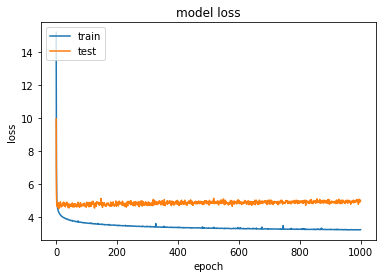

In [44]:
# filename = 'best_with_auroral_region3'

# # model = tensorflow.keras.models.load_model(filename)
# model.save(filename)
# # model.save_weights('my_model_weights2.h5')


print(history.history.keys())
plt.figure()
# summarize history for loss
plt.plot(history.history['loss'][:])
plt.plot(history.history['val_loss'][:])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()



55210
(55210,)


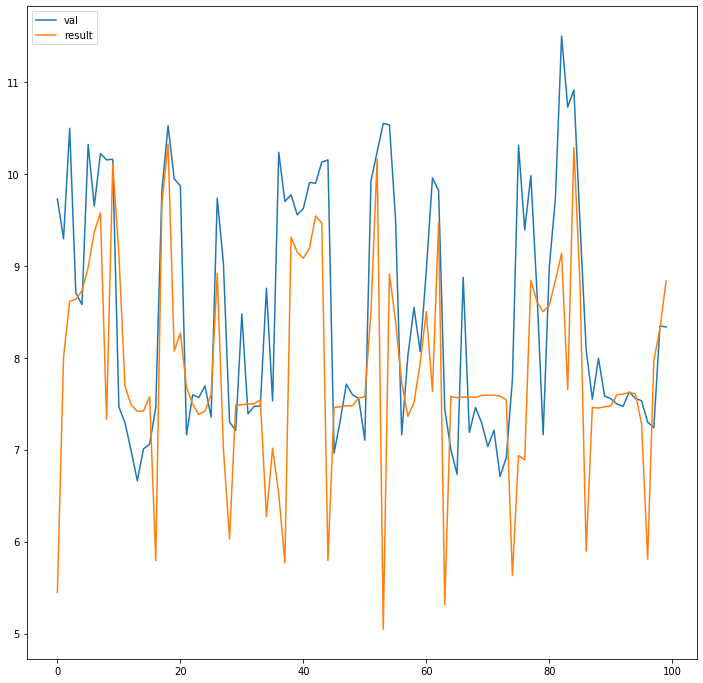

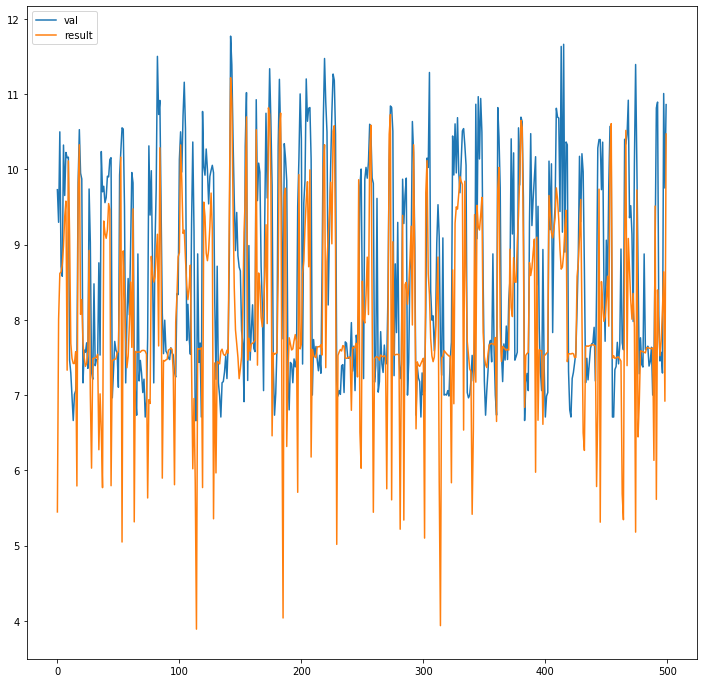

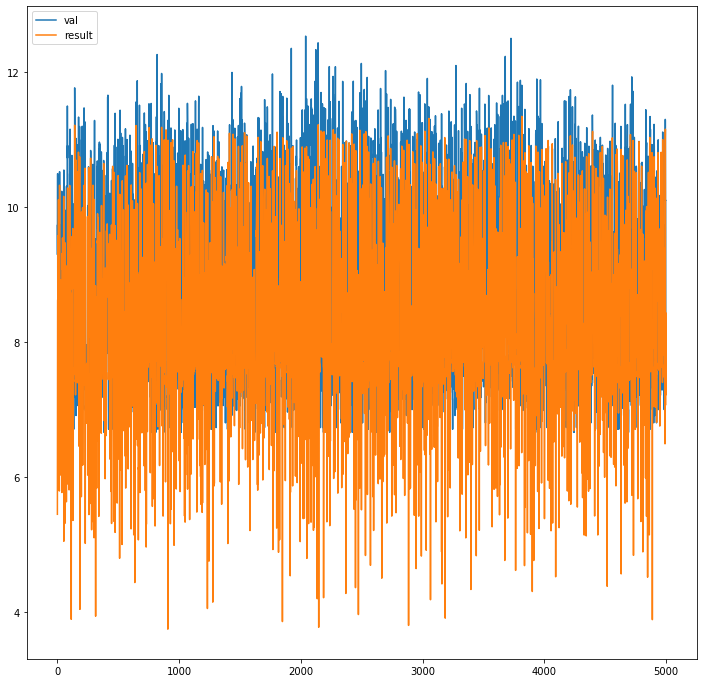

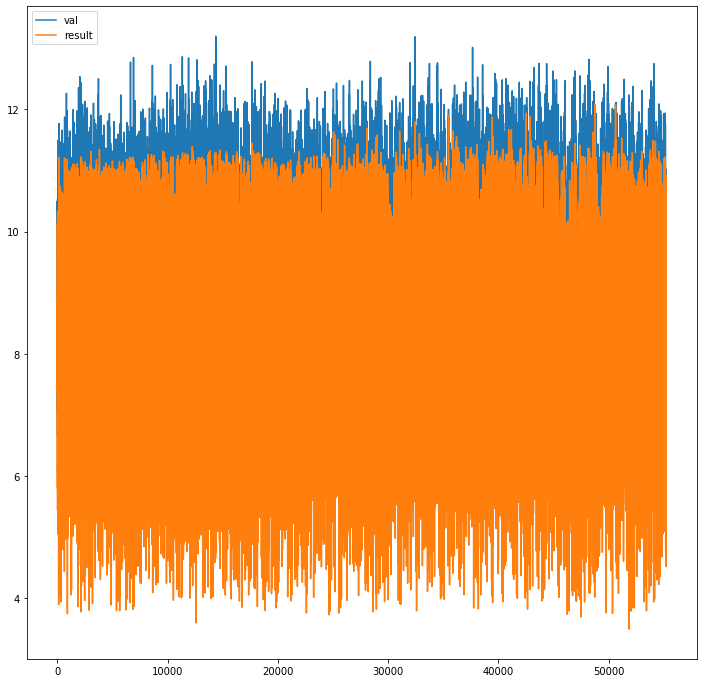

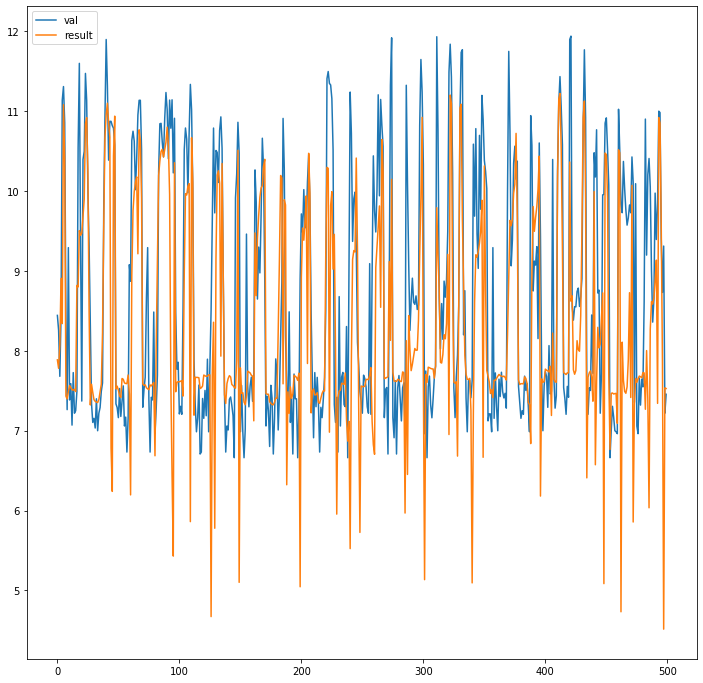

In [45]:
results1 = model.predict(X_val_scaled)#, y_val_log.values)#, batch_size=128)
print(results1.shape[0])
results = np.zeros((results1.shape[0]))
y = np.zeros((results1.shape[0]))
print(y.shape)
for i in range(0,results1.shape[0]):
    results[i]= np.max(results1[i,:])
    y[i] = np.max(y_val_log[i,:])
    
plt.figure(figsize=(12,12))
plt.plot(y[:100])
plt.plot(results[:100])
plt.legend(['val', 'result'], loc='upper left')
plt.show()

plt.figure(figsize=(12,12))
plt.plot(y[:500])
plt.plot(results[:500])
plt.legend(['val', 'result'], loc='upper left')
plt.show()

plt.figure(figsize=(12,12))
plt.plot(y[:5000])
plt.plot(results[:5000])
plt.legend(['val', 'result'], loc='upper left')
plt.show()

plt.figure(figsize=(12,12))
plt.plot(y[:])
plt.plot(results[:])
plt.legend(['val', 'result'], loc='upper left')
plt.show()

plt.figure(figsize=(12,12))
plt.plot(y[-500:])
plt.plot(results[-500:])
plt.legend(['val', 'result'], loc='upper left')
plt.show()

In [46]:
mse_final = np.average((results-y)**2)
print(mse_final)

1.7733226295526054
